# **Exploring California Housing Prices**

**Introduction**

This is an end-to-end Machine Learning project on California Housing Prices developed by Python using the concepts and principles in Statistical and Machine learning. We selected the dataset of California Housing Prices from the Kaggle website where the link is, , https://www.kaggle.com/datasets/camnugent/california-housing-prices/

This report is divided into several parts, which are:

1. Data Exploration and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Model Selection
4. Model Training and Evaluation
5. Hyperparameter Tuning
6. Comparison and Conclusion

**Dataset Background**

This data focuses on the housing situation within a particular district in California. It draws on 1990 census statistics to provide insights into the basic characteristics of homes in this area.


Details of the file :


•	longitude: Indicates the distance west a house is located. Higher values represent locations further west.

•	latitude: Indicates the distance north a house is located. Higher values represent locations further north.

•	housing_median_age: The average age of houses within a block. Lower values represent newer housing.

•	total_rooms: Count of block houses' rooms.

•	total_bedrooms: Count of bedrooms in block houses.

•	population: Total block residents.
•	households: Headcount of families in the block.

•	median_income: The middle value of household income within a block, represented by ’10,000 USD.

•	median_house_value: Center point of house valuation distribution for block properties (USD).

•	ocean_proximity: The relative distance in houses within a block to the ocean or sea.



**Target Variable:**

Our aim in this study is to estimate the median house value of a household in a house in California given the appropriate features provided.

# **Importing and Reading Data**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy import stats
from pandas.plotting import scatter_matrix
from scipy.stats.mstats import winsorize
import statsmodels.stats.api as sms
from zlib import crc32
from sklearn.preprocessing import OneHotEncoder
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.tree import plot_tree
import xgboost as xgb

**Uploading File and Importing Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


**Reading File**

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

# **Data Exploration and Preprocessing**

**Structure of Dataset**

In [ ]:
df.shape

(20640, 10)

The housing dataset has 20640 rows and 10 columns.

Below is the first 5 data records.

In [ ]:
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Below is the last 5 data records.

In [ ]:
df.tail(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Based on the names of the columns as above, there is no unwanted columns nor any duplicate columns and all the columns are in appropriate names, therefore those are kept as it is.

**Features of Dataset**

The data type of each column is,

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

The ocean_proximity is an object type which is a categorical variable. And the other variables are float64 which are values with floating point numbers.

Thereby, we seperated the variables into numerical and categorical variables

In [ ]:
numerical_variables = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
categorical_variable = ['ocean_proximity']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Based on the information from the dataset, we can see some values will be null values in the total_bedrooms as the count of non-null entries is less than the total number of entries. Those missing values must be fixed.


Below are some descriptive statistics of the housing dataset.

In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

**Potential Challenges of Dataset**

Based on the results of the descriptive statistics of the dataset, some of the potential challenges we found from the dataset is that,
•	Missing Values – In the ‘count’ row, total_bedrooms have a different value which is less than the other count values of the variables.

•	Outliers - There are significant differences between the 75th percentile and the maximum values in several columns, such as "total_rooms," "total_bedrooms," "population," and "households." This shows that the presence of outliers that might skew the models.

•	Scale Discrepancy - Columns like "total_rooms," "total_bedrooms," "population," and "households" have large ranges while “housing_median_age”, “median_income” have small ranges. Therefore, it's important to scale the features to prevent certain features from dominating the learning process.

•	Categorical Variables – “ocean_proximity” must be encoded to get proper interpretations.


**Checking for Duplicates**

In [ ]:
df.duplicated().sum()

0

There are no duplicated rows in the dataset.

**Checking for Missing Values**

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 missing values in total_bedrooms field in the dataset while in other columns there are no missing data.

The null values can be shown in a bar plot as,

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

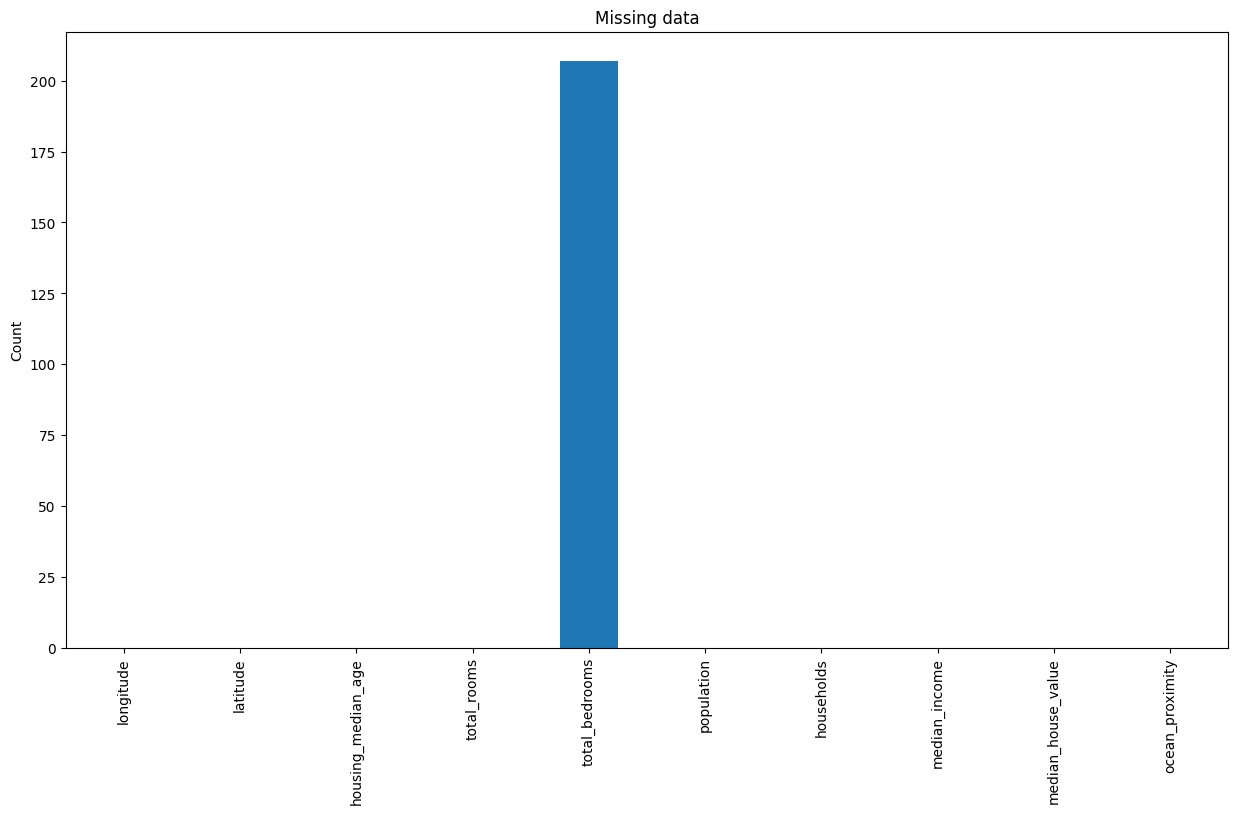

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
df.isnull().sum().plot(kind= 'bar' )

**Handling Missing Values**

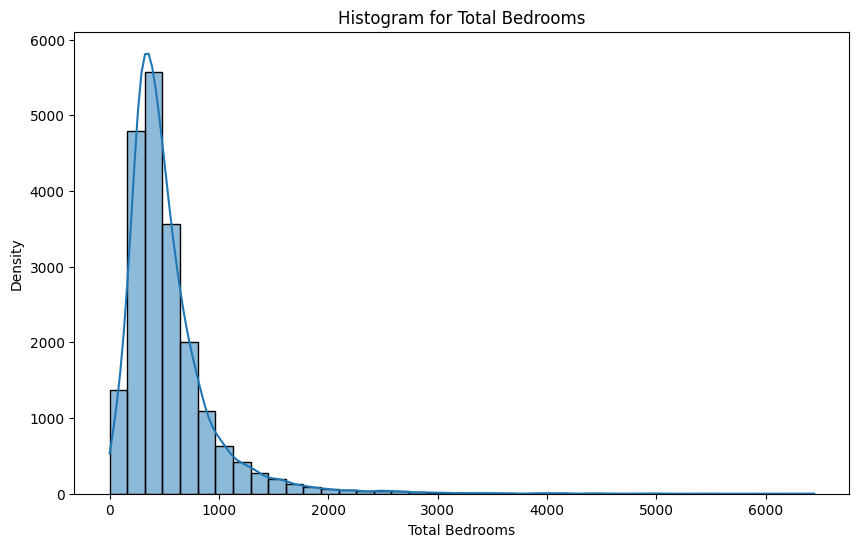

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [ ]:
fig, axes = plt.subplots(figsize=(10, 6))
sns.histplot(x="total_bedrooms", kde=True, data=df, bins=40, ax=axes)
axes.set(xlabel="Total Bedrooms", ylabel='Density')
plt.title('Histogram for Total Bedrooms')
plt.show()

df['total_bedrooms'].describe()

This shows that the distribution is positively skewed, therefore rather than applying mean, since it’s not a normal distribution, the null values will be replaced with the median of the total_bedrooms using the below function.

In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

Now all there are no null values, and all columns have equal number of instances as the null values of total_bedrooms are replaced with it's median value.

In [ ]:
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20640
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

Now all there are no null values, and all columns have equal number of instances as the null values of total_bedrooms are replaced with it's median value.

Since the median house value cannot be zero, we checked as if there’s a record where the median value is zero also.

In [ ]:
(df['median_house_value']==0).sum()

0

However, based on the output there was no any row where the house value was zero to consider as a missing value.

**Checking & Handling Outliers**

We shall first look into the histograms of the numerical / continuous variables.

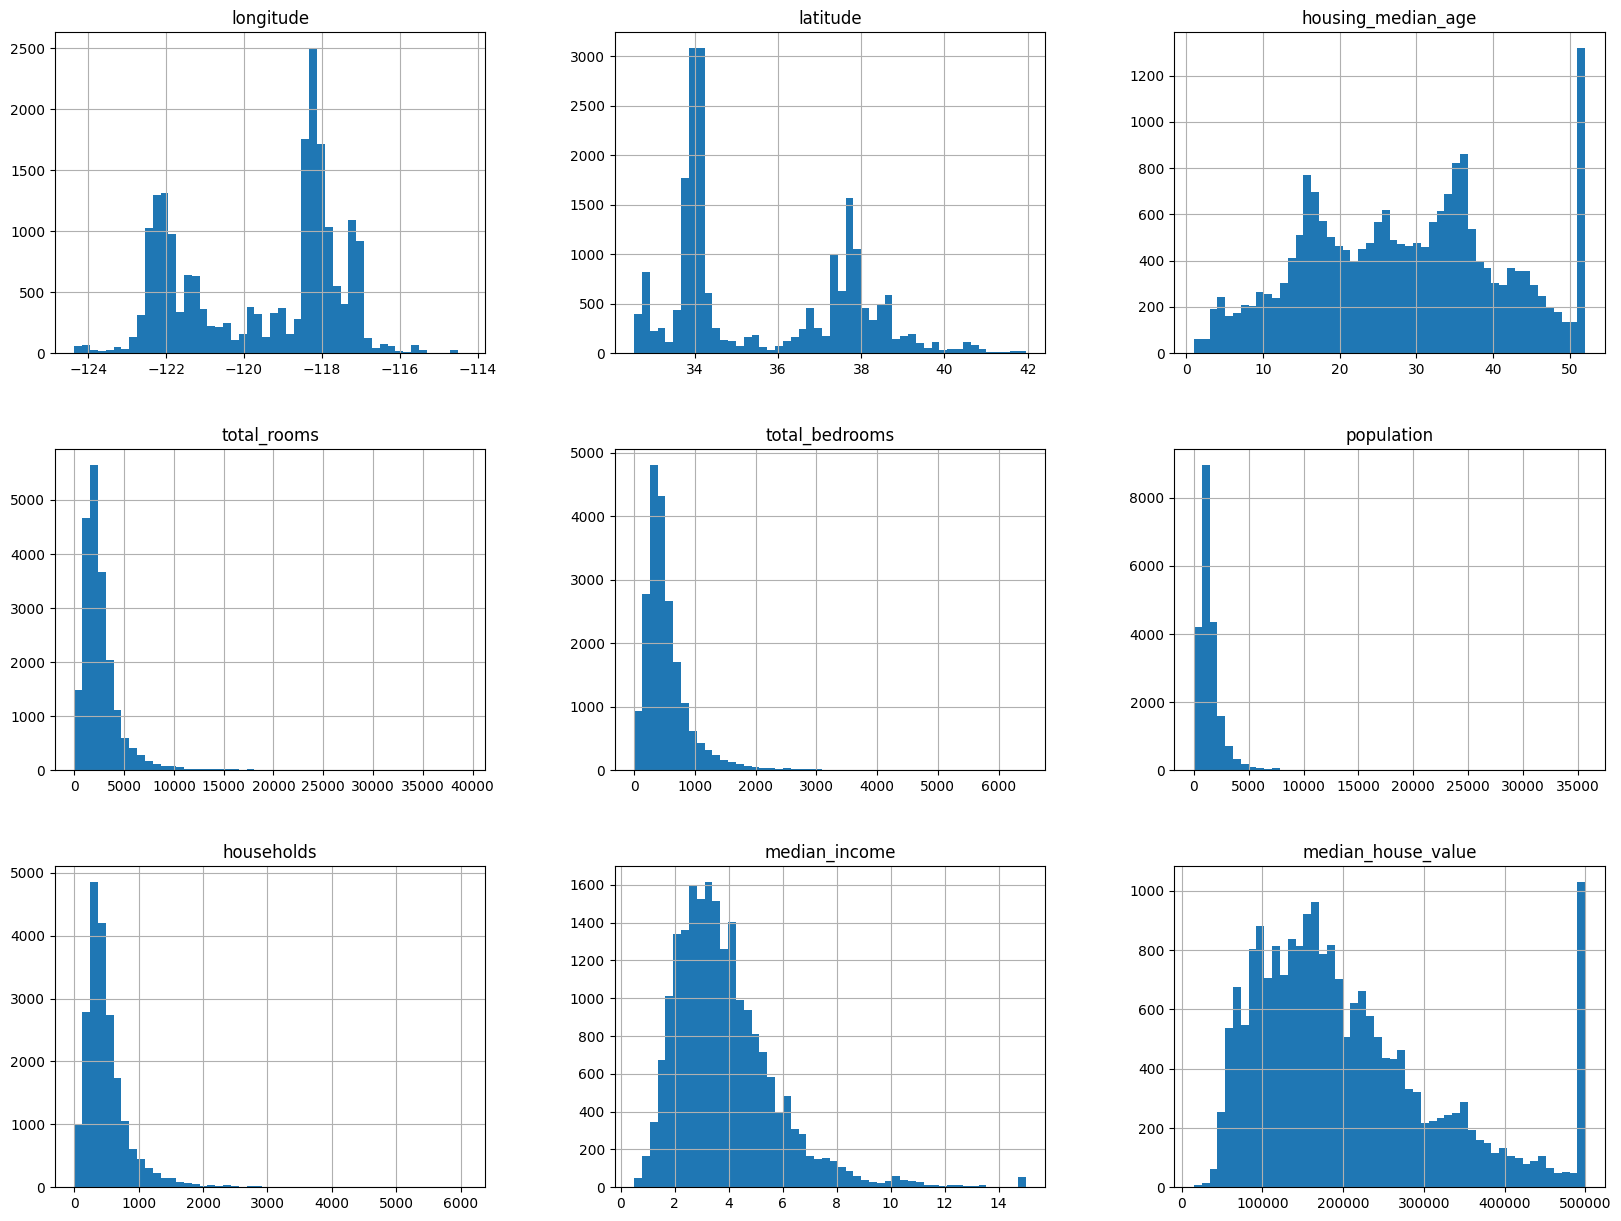

In [ ]:
df[numerical_variables].hist(bins=50,figsize=(20,15))
plt.show()

Before fixing the outliers, if we obtain a plot of histograms for each numerical feature, we can observe how each variable is distributed, we can most of the distributions are highly right skewed, therefore fixing the outliers are necessary for it to have a bell-shaped distribution.

*Target Variable Outliers*

In order to see the distribution of the median_house_value variable we zoom into its histogram, and we shall check the data distribution of the variable.

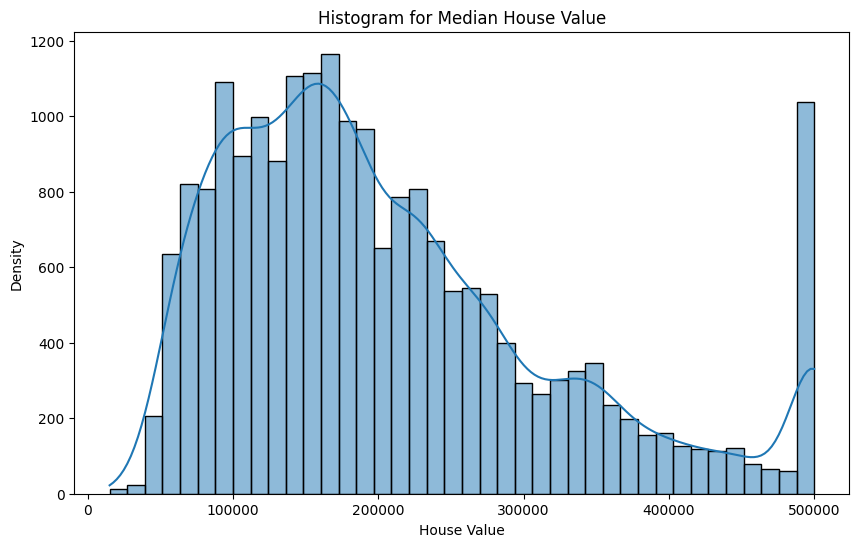

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
fig, axes = plt.subplots(figsize=(10, 6))
sns.histplot(x="median_house_value", kde=True, data=df, bins=40, ax=axes)
axes.set(xlabel="House Value", ylabel='Density')
plt.title('Histogram for Median House Value')
plt.show()

df['median_house_value'].describe()

Based on the chart we can see that the chart is skewed to the right and there's a spike towards the end of the range showing high prices, which is likely to be due to outliers.

Analysis of the summary statistics reveals a large spread between the most expensive and the 75th percentile houses, indicating substantial price variation within the district. Based on the boxplot of median_house_value, we will investigate the outliers.

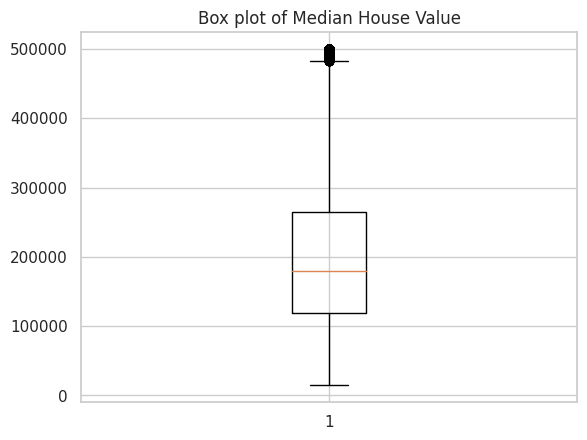

In [ ]:
# generating a boxplot for the target variable
plt.boxplot(df['median_house_value'])
plt.title('Box plot of Median House Value')
plt.show()

As the box plot shows, the Median House Value distribution which is biased to the right.

If we zoom in more to see, why the median_house_value has a peak towards the high prices, based on our categorical variable ocean_proximity we will classify the house_value.


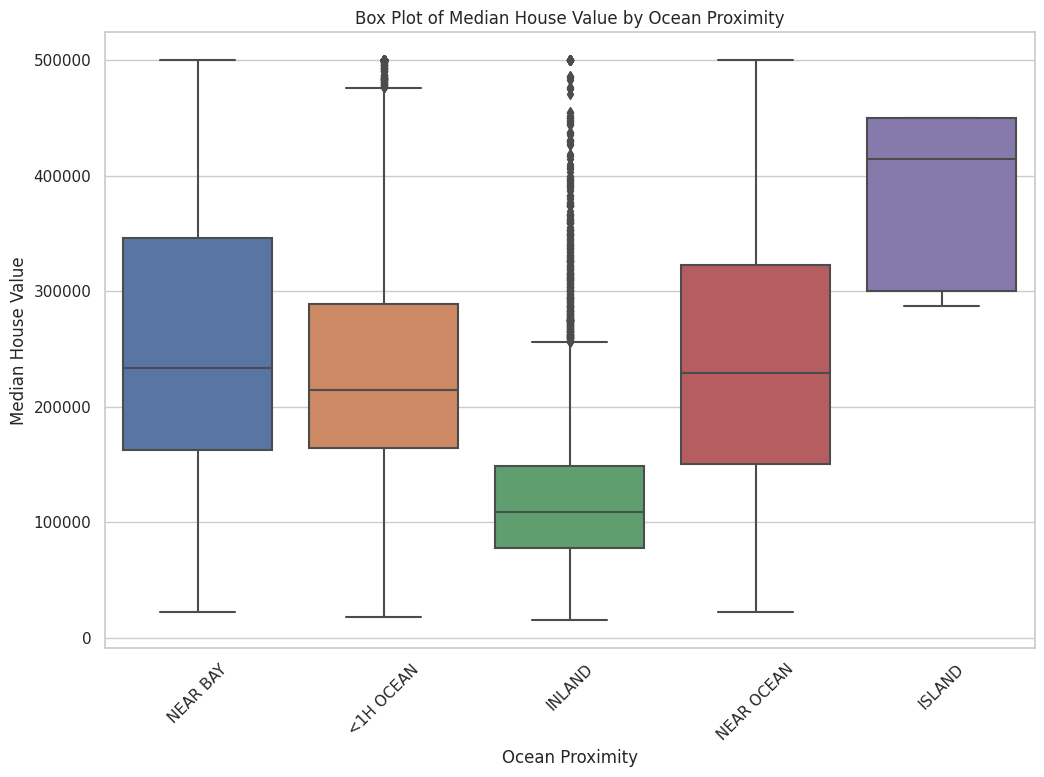

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Box Plot of Median House Value by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

Based on the boxplot of median house value by ocean proximity we can see that only blocks in INLAND have most of the outliers, which means the blocks in INLAND tend to have exceptionally high prices also the <IH OCEAN blocks also have some outliers.

In [ ]:
# calculating the IQR for the target variable to find any outliers
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = (df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")
print(f"Number of outliers: {len(df[outliers_iqr])}")
print("Rows with outliers based on IQR:")
print(df[outliers_iqr])

lower_bound: -98087.5
upper_bound: 482412.5
Number of outliers: 1071
Rows with outliers based on IQR:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                52.0        249.0            78.0   
140      -122.18     37.81                30.0        292.0            38.0   
459      -122.25     37.87                52.0        609.0           236.0   
489      -122.25     37.86                48.0       2153.0           517.0   
493      -122.24     37.86                52.0       1668.0           225.0   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14                35.0       1503.0           263.0   
20426    -118.69     34.18                11.0       1177.0           138.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   
20436    -118.69     34.21                10.0       3663.0           409.0   
20443    -118.85     34.27   

After calculating the IQR for the target variable to find any outliers we see the rows where the median_house_value is an outlier, and we can see that there are 1071 instances where median_house_value is an outlier. We should handle the outliers properly, without losing any of the valuable information (rather than removing the rows with outliers). Since the outliers are more towards the higher values, capping at the higher values would help to limit the impact of extreme values without removing them entirely as there is important data. The upper bound was 482412.50 and the values above that value was capped at the upper bound.

In [ ]:
df['median_house_value'] = np.where(df['median_house_value'] > upper_bound, upper_bound, df['median_house_value'])

Now let's check if there's still any outliers

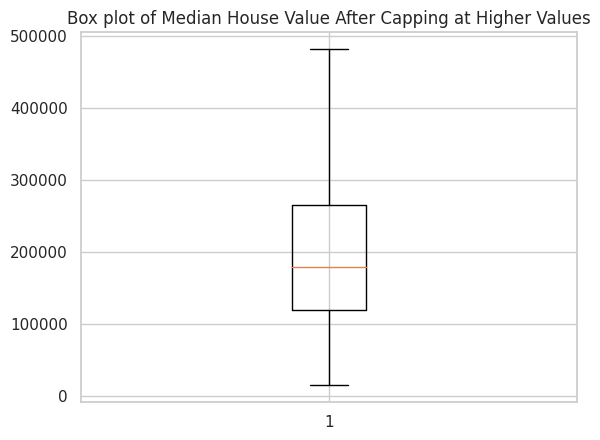

Number of Outliers After Capping at Higher Values: 0
Rows with outliers based on IQR:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [ ]:
# generating a boxplot for the target variable after capping at higher values
plt.boxplot(df['median_house_value'])
plt.title('Box plot of Median House Value After Capping at Higher Values')
plt.show()

# calculating the IQR for the target variable to find any outliers
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = (df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)

print(f"Number of Outliers After Capping at Higher Values: {len(df[outliers_iqr])}")
print("Rows with outliers based on IQR:")
print(df[outliers_iqr])

We can see that there are no more outliers in the target variable after capping towards the higher values.

*Other Numerical Variables*

We shall check if there are any outliers in the other numerical variables.

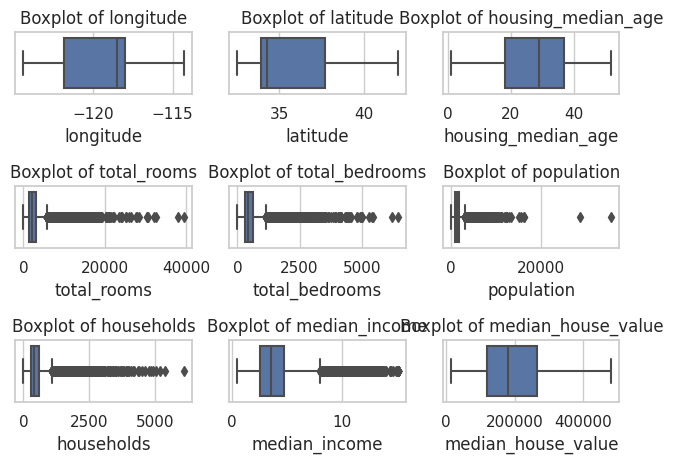

Number of outliers in longitude: 0
Number of outliers in latitude: 0
Number of outliers in housing_median_age: 0
Number of outliers in total_rooms: 1287
Number of outliers in total_bedrooms: 1306
Number of outliers in population: 1196
Number of outliers in households: 1220
Number of outliers in median_income: 681
Number of outliers in median_house_value: 0


In [ ]:
# generating boxplots for other numerical variables
for i, column in enumerate(numerical_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# calculating the IQR for the other numerical variables to find any outliers
for column in numerical_variables:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = (df[column] < lower_bound) | (df[column] > upper_bound)

    print(f"Number of outliers in {column}: {len(df[outliers_iqr])}")

Based on the boxplot results and the IQR results both, we can see that there are outliers for 'median_income', 'total_bedrooms', 'total_rooms', 'population' and 'households'

Next we must take steps to fix the outliers from those.


In [ ]:
outlier_columns = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


Each data column underwent clipping to limit values. The maximum allowable value was set to a multiplier of the Interquartile Range (IQR), exceeding the highest quartile (Q3) by 1.5 times. Similarly, the minimum value was set 1.5 times below the lowest quartile (Q1). Where this will effectively remove any outliers from the dataset.

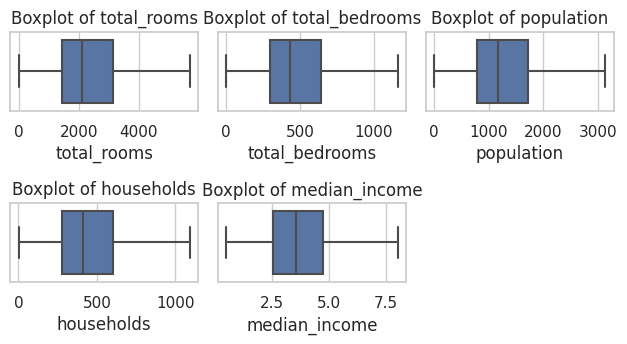

Number of outliers after clipping in total_rooms: 0
Number of outliers after clipping in total_bedrooms: 0
Number of outliers after clipping in population: 0
Number of outliers after clipping in households: 0
Number of outliers after clipping in median_income: 0


In [ ]:
# generating boxplots for other numerical variables after clipping
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# calculating the IQR for the other numerical variables to find any outliers after clipping
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = (df[column] < lower_bound) | (df[column] > upper_bound)

    print(f"Number of outliers after clipping in {column}: {len(df[outliers_iqr])}")

Now all the outliers in the dataset are fixed.

**Feature Generation**

Additional features provide a better view of the housing environment by considering the average number of rooms in a household, the distribution of bed-rooms, and the population density within households. Including these features in our model allows it to extract finer information and relationships from data, potentially improving its ability to predict the target variable (median house value).

•	Rooms per Household:
This represents, on average, how many rooms there are in each household which is a unit of home in which a group of people live together. It gives an idea of the size or the capacity of homes in a particular area. In simple terms the number of rooms in each house unit on average. The aggregate amount of rooms in a block is divided by the aggregate amount of household units.

•	Bedrooms per Room:
This metric, calculated as the ratio of bedrooms to total rooms within a residential block, offers information about the proportion of bedrooms compared to other rooms within the houses.

•	Population per Household:
This indicates, on average, how many people are there in each household or the average population in a household. It helps understand the population density within homes. This is calculated by taking the ratio of the total population with the total number of households.

In [ ]:
df["total_rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_total_rooms"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0      880.000           129.0   
1        -122.22     37.86                21.0     5698.375          1106.0   
2        -122.24     37.85                52.0     1467.000           190.0   
3        -122.25     37.85                52.0     1274.000           235.0   
4        -122.25     37.85                52.0     1627.000           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0     1665.000           374.0   
20636    -121.21     39.49                18.0      697.000           150.0   
20637    -121.22     39.43                17.0     2254.000           485.0   
20638    -121.32     39.43                18.0     1860.000           409.0   
20639    -121.24     39.37                16.0     2785.000           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0       8.013025            452600.0   
1          2401.0      1092.5       8.013025            358500.0   
2           496.0       177.0       7.257400            352100.0   
3           558.0       219.0       5.643100            341300.0   
4           565.0       259.0       3.846200            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0       1.560300             78100.0   
20636       356.0       114.0       2.556800             77100.0   
20637      1007.0       433.0       1.700000             92300.0   
20638       741.0       349.0       1.867200             84700.0   
20639      1387.0       530.0       2.388600             89400.0   

      ocean_proximity  total_rooms_per_household  bedrooms_per_total_rooms  \
0            NEAR BAY                   6.984127                  0.146591   
1            NEAR BAY                   5.215904                  0.194090   
2            NEAR BAY                   8.288136                  0.129516   
3            NEAR BAY                   5.817352                  0.184458   
4            NEAR BAY                   6.281853                  0.172096   
...               ...                        ...                       ...   
20635          INLAND                   5.045455                  0.224625   
20636          INLAND                   6.114035                  0.215208   
20637          INLAND                   5.205543                  0.215173   
20638          INLAND                   5.329513                  0.219892   
20639          INLAND                   5.254717                  0.221185   

       population_per_household  
0                      2.555556  
1                      2.197712  
2                      2.802260  
3                      2.547945  
4                      2.181467  
...                         ...  
20635                  2.560606  
20636                  3.122807  
20637                  2.325635  
20638                  2.123209  
20639                  2.616981  

[20640 rows x 13 columns]

In [ ]:
numerical_variables = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', "total_rooms_per_household", "bedrooms_per_total_rooms", "population_per_household"]

**Encoding Categorical Variables**

Since ocean_proximity is a categorical variable, it must be pre-processed to convert to a numerical variable.

If the categories are not in order, OneHot Encoding is preferred. Ocean proximity variables do not exist in any order in our situation. The groups will be transformed into binary representation (1s or 0s) by using one hot, and that original categorical variable will be separated into multiple features equal to the number of groups.


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

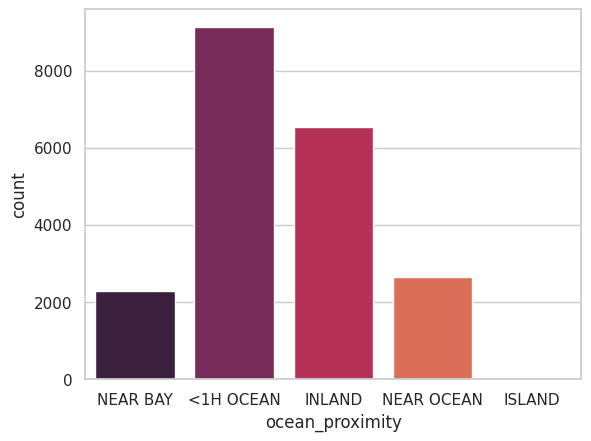

In [ ]:
df['ocean_proximity'].value_counts()
sns.countplot(x = df['ocean_proximity'], palette= 'rocket')
df["ocean_proximity"].value_counts()

The ocean_proximity which is the only categorical variable, there are 5 sub categories under ocean_proximity.

Rather than using OrdinaryEncoder, we prefer to use OneHotEncoder (as ocean_proximity is a nominal variable) in this case by creating per category of a categorical variable, a binary attribute and naming it 1 if it’s allocated on that row or else 0 if not.

Using the below code, we converted the categorical variable based on OneHotEncoding.


In [ ]:
df = pd.get_dummies(df, columns=["ocean_proximity"])

In [ ]:
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0      880.000           129.0   
1    -122.22     37.86                21.0     5698.375          1106.0   
2    -122.24     37.85                52.0     1467.000           190.0   
3    -122.25     37.85                52.0     1274.000           235.0   
4    -122.25     37.85                52.0     1627.000           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0       8.013025            452600.0   
1      2401.0      1092.5       8.013025            358500.0   
2       496.0       177.0       7.257400            352100.0   
3       558.0       219.0       5.643100            341300.0   
4       565.0       259.0       3.846200            342200.0   

   total_rooms_per_household  bedrooms_per_total_rooms  \
0                   6.984127                  0.146591   
1                   5.215904                  0.194090   
2                   8.288136                  0.129516   
3                   5.817352                  0.184458   
4                   6.281853                  0.172096   

   population_per_household  ocean_proximity_<1H OCEAN  \
0                  2.555556                          0   
1                  2.197712                          0   
2                  2.802260                          0   
3                  2.547945                          0   
4                  2.181467                          0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

We can see that categorical variable in our dataset, which is ocean_proximity have been converted as a numerical variable.

**Scaling Numerical Features**

Since ocean_proximity is a categorical variable, it will not be included in the scaling process. We use standardization here, using StandardScaler. In standardization, features which are numerical which means without the categorical variable and the target variable are rescaled so that it’s mean is of zero and has a deviation of a unit standard deviation. Using the below code, we scaled the data.

In [ ]:
columns_to_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', "total_rooms_per_household", "bedrooms_per_total_rooms", "population_per_household"]

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327835  1.052548            0.982143    -1.117285       -1.309916   
1      -1.322844  1.043185           -0.607019     2.329936        2.128690   
2      -1.332827  1.038503            1.856182    -0.697327       -1.095223   
3      -1.337818  1.038503            1.856182    -0.835405       -0.936843   
4      -1.337818  1.038503            1.856182    -0.582857       -0.778463   
...          ...       ...                 ...          ...             ...   
20635  -0.758826  1.801647           -0.289187    -0.555671       -0.447624   
20636  -0.818722  1.806329           -0.845393    -1.248209       -1.236005   
20637  -0.823713  1.778237           -0.924851    -0.134281       -0.056954   
20638  -0.873626  1.778237           -0.845393    -0.416162       -0.324440   
20639  -0.833696  1.750146           -1.004309     0.245613        0.404108   

       population  households  median_income  median_house_value  \
0       -1.325821   -1.291972       2.541006            452600.0   
1        1.389936    2.348314       2.541006            358500.0   
2       -1.098528   -1.099883       2.085156            352100.0   
3       -1.017539   -0.941691       1.111288            341300.0   
4       -1.008395   -0.791033       0.027262            342200.0   
...           ...         ...            ...                 ...   
20635   -0.642637   -0.523614      -1.351765             78100.0   
20636   -1.281408   -1.337170      -0.750601             77100.0   
20637   -0.431019   -0.135668      -1.267488             92300.0   
20638   -0.778490   -0.452051      -1.166620             84700.0   
20639    0.065368    0.229678      -0.852072             89400.0   

       total_rooms_per_household  bedrooms_per_total_rooms  \
0                       0.660783                 -1.057145   
1                      -0.074654                 -0.307692   
2                       1.203144                 -1.326555   
3                       0.175499                 -0.459668   
4                       0.368694                 -0.654725   
...                          ...                       ...   
20635                  -0.145547                  0.174080   
20636                   0.298895                  0.025504   
20637                  -0.078963                  0.024951   
20638                  -0.027402                  0.099415   
20639                  -0.058511                  0.119808   

       population_per_household  ocean_proximity_<1H OCEAN  \
0                     -0.085602                          0   
1                     -0.154411                          0   
2                     -0.038164                          0   
3                     -0.087066                          0   
4                     -0.157534                          0   
...                         ...                        ...   
20635                 -0.084631                          0   
20636                  0.023472                          0   
20637                 -0.129813                          0   
20638                 -0.168736                          0   
20639                 -0.073791                          0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
20635                       1                       0   
20636                       1                       0   
20637                       1                       0   
20638                       1                       0   
20639                       1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0   

# **Exploratory Data Analysis (EDA)**

For numerous reasons, exploratory data analysis (EDA) is a critical phase in the machine learning (ML) workflow.

EDA assists us in grasping the dataset we're dealing with. We can investigate the data's structure, trends, and relationships. Understanding the features of the data is critical for making informed decisions throughout the ML process.

EDA enables us to spot patterns, trends, and abnormalities in data. This can help us make more informed judgments about feature engineering, model selection, and future ML difficulties.

EDA relies heavily on visualization. Visualizing data with plots and charts allows for a better understanding of data distribution, linkages, and trends. It is more intuitive to understand than raw numerical reports.



**EDA for Insights of Relationships of Data**

After fixing the missing values and outliers, encoding categorical variables and scaling we'll look for insights of the relationships of data.

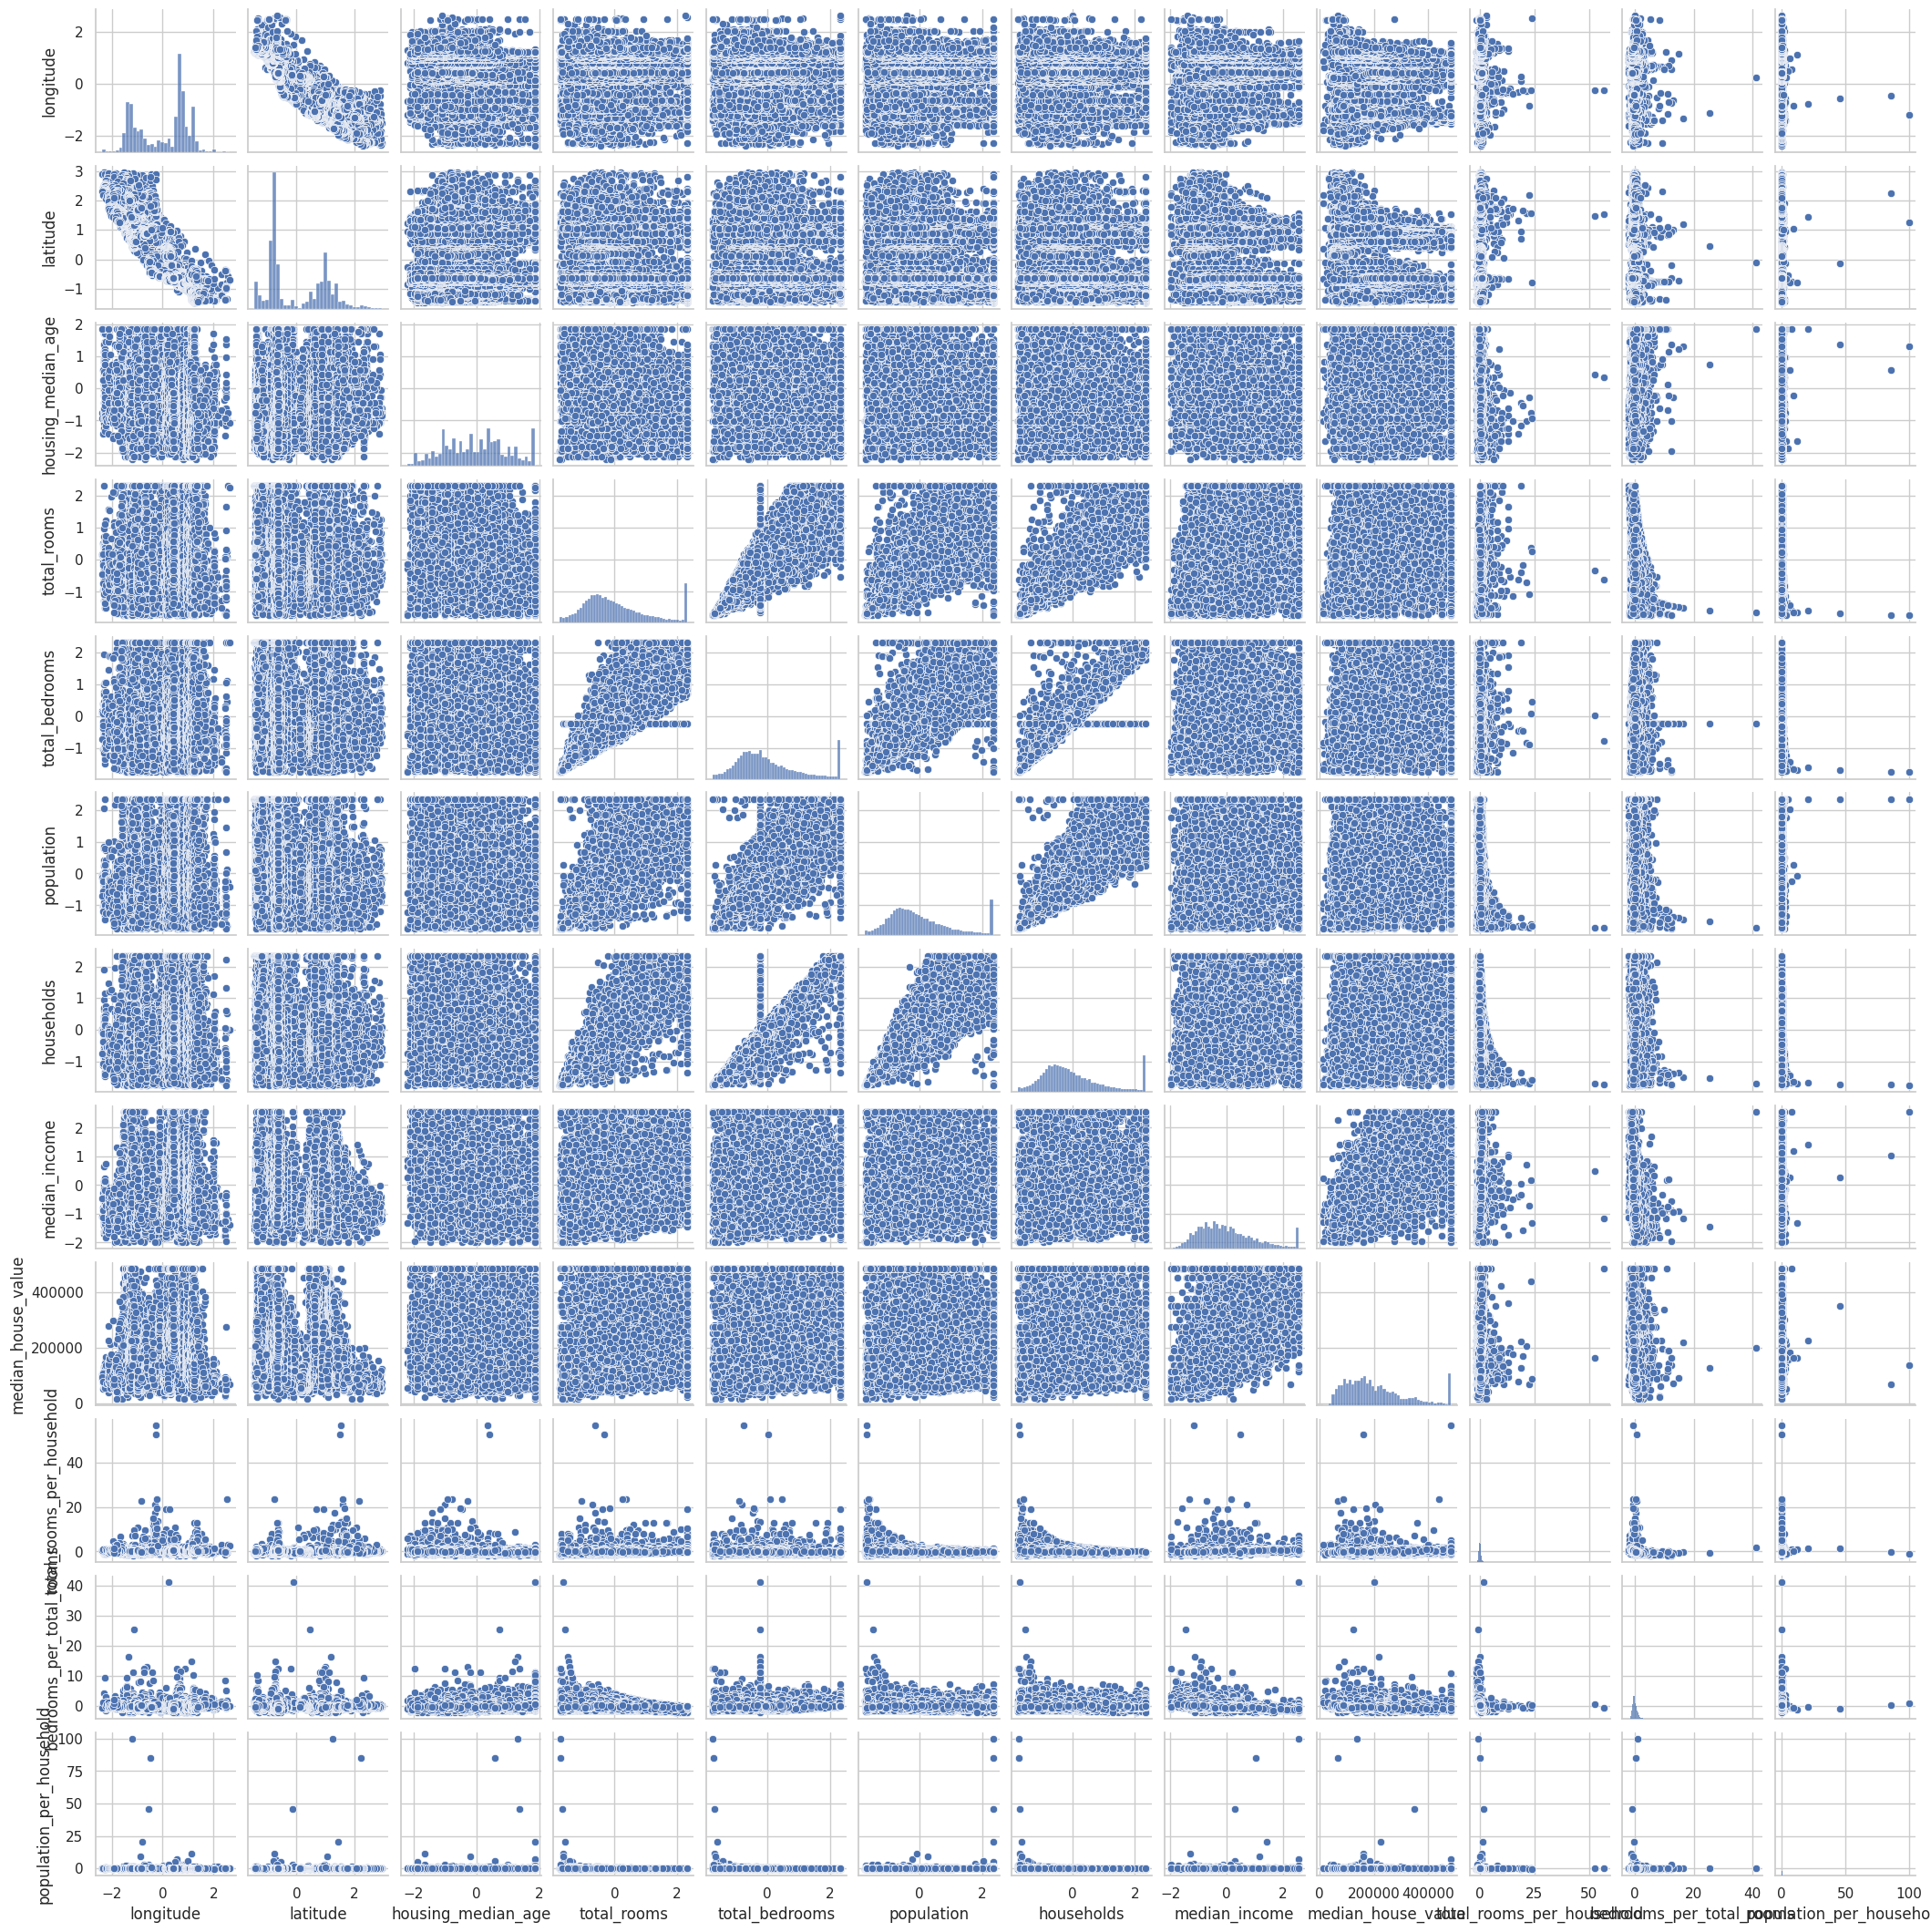

In [ ]:
sns.pairplot(df[numerical_variables], height=1.8)
plt.show()

Based on the pair plot we can recognize the relationship of each variable with other variables after including the additional features generated. We can see the direction of the relationship, the strength and the linearity of the relationship and the correlations can be clearly noticed.

 **Features Visualizations and Distributions.**

KDE For Each Variable :

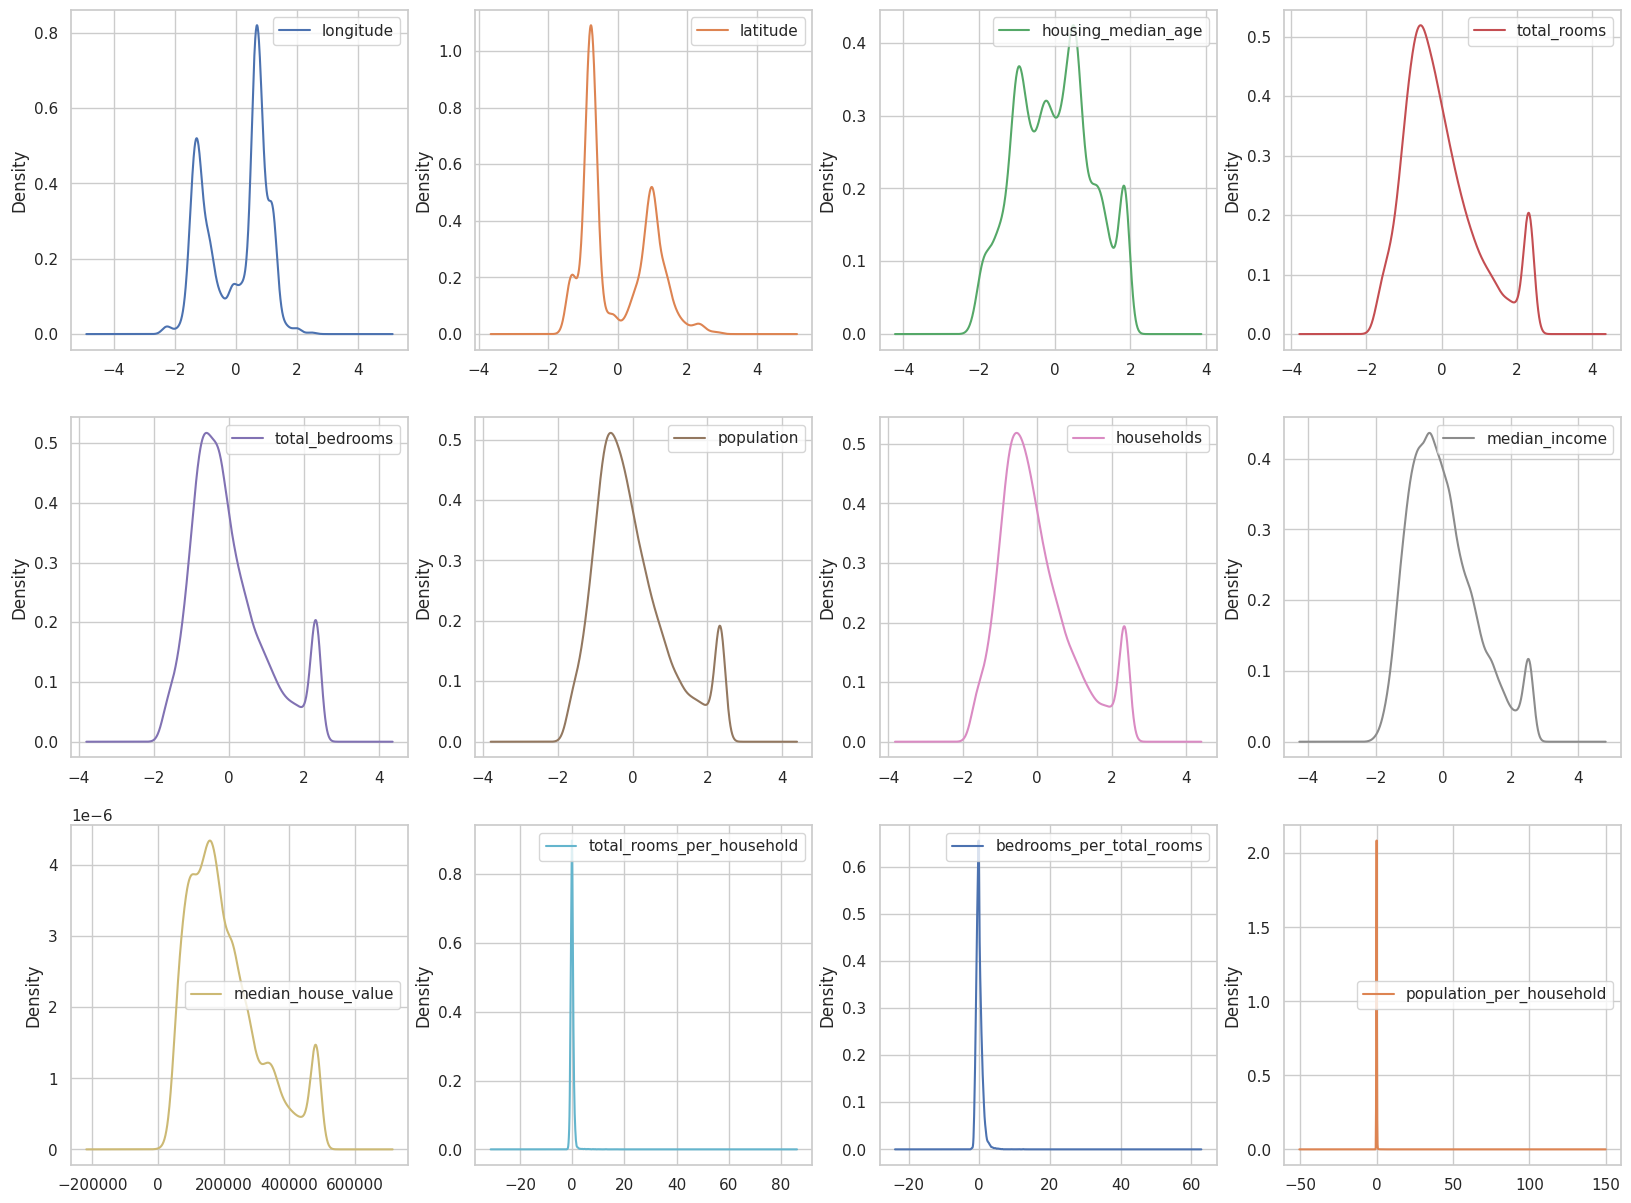

In [ ]:
df[numerical_variables].plot(kind='kde', subplots=True, layout=(3,4), sharex=False, figsize=(20, 15))
plt.show()

Based on the Kernel Density Estimation (KDE) plot of each attribute, the distribution is more bell-shaped than it used to be before fixing the outliers.

Geographical Data :
Let's map the values now that we've got latitude and longitude. It can assist us in locating certain buildings onto the geographical representation, and it might look similar to the California map.

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


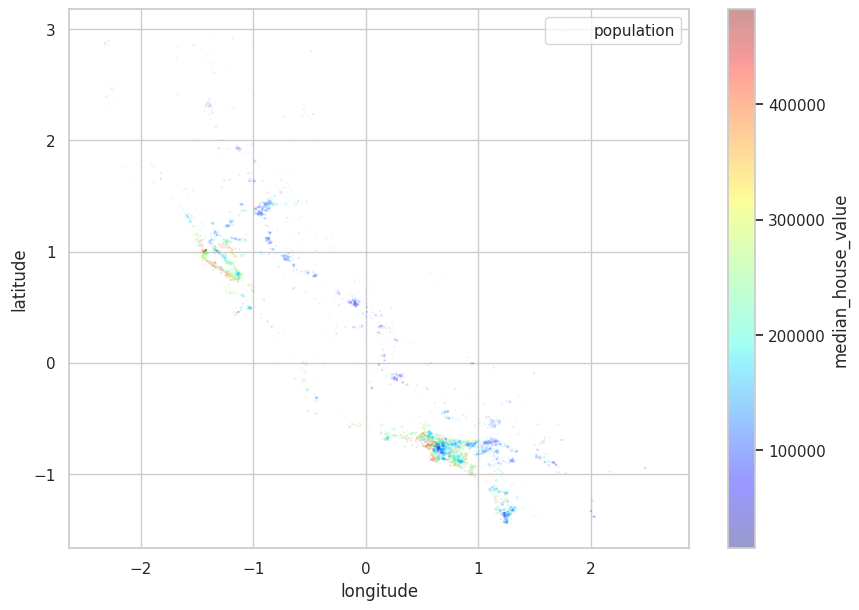

In [ ]:
# visualization of geographical distribution of data
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

We can see the high-density areas and see that Northern and Southern California are more populated compared to other regions. We can also see how much the value of the houses is related to the location because at clusters the prices are high. It stands to reason that highly costly housing is those closest to the ocean. This is confirmed with ocean_proximity.

**Correlations Between Variables**

In [ ]:
x = df.corr()
print(x)

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.029832 -0.028146           -0.381712   
total_bedrooms               0.062197 -0.066318           -0.327458   
population                   0.116115 -0.133225           -0.307620   
households                   0.054723 -0.079117           -0.307402   
median_income               -0.015461 -0.084654           -0.142435   
median_house_value          -0.046311 -0.145494            0.104423   
total_rooms_per_household   -0.035405  0.111227           -0.134968   
bedrooms_per_total_rooms     0.080749 -0.096424            0.127413   
population_per_household     0.014825 -0.007158            0.013067   
ocean_proximity_<1H OCEAN    0.321121 -0.446969            0.045300   
ocean_

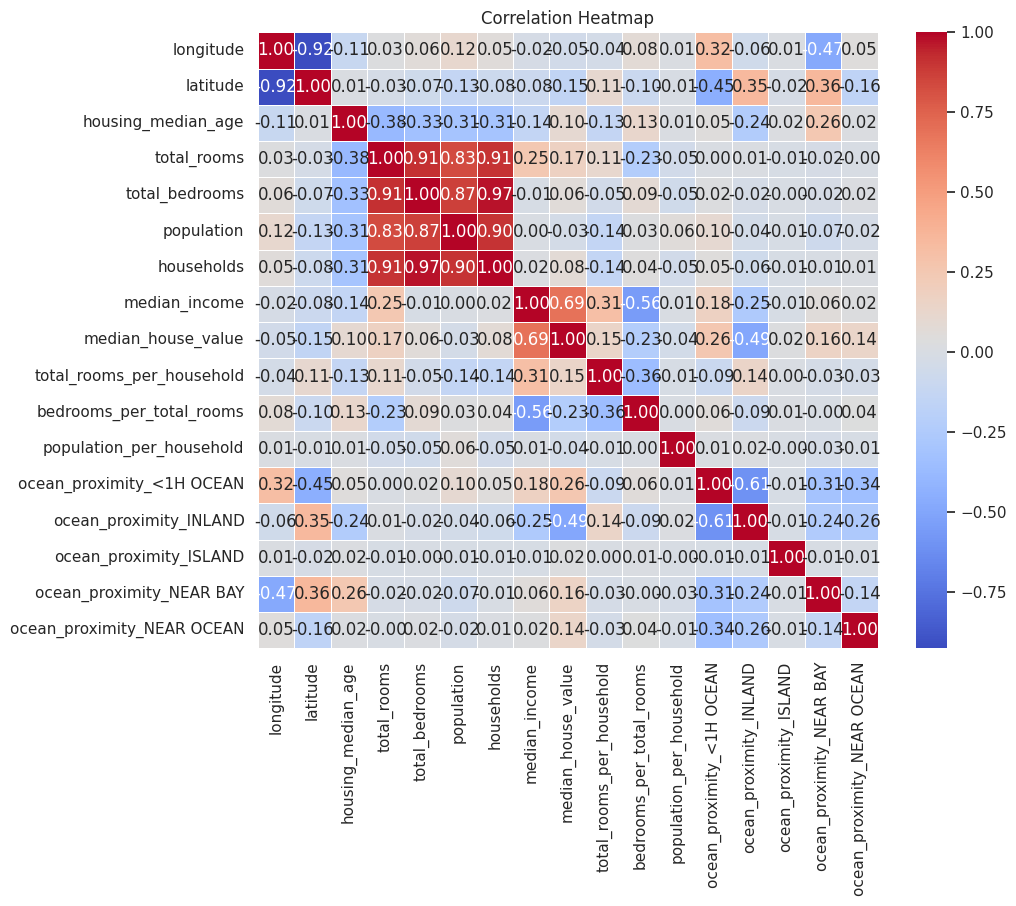

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(x, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Based on the correlations,

•	total_rooms, population, households and total_bedrooms are highly positively correlated to each other.

•	Several features, such as households with total bedrooms variables, are strongly linked. The same is true for total rooms with total bedrooms columns, this is made obvious because the number of households in a house is related to the amount of rooms (total rooms) and bed rooms.

•	Another noteworthy finding indicates that the value of a house is thoroughly tied to the median income, which seems to be reasonable. In several circumstances, one will look for a house in which that person can reasonably afford depending on your salary.

In [ ]:
# Finding how much each attribute correlates with the median house value which is the dependant variable
print(x ["median_house_value"].sort_values(ascending=False))

median_house_value            1.000000
median_income                 0.689654
ocean_proximity_<1H OCEAN     0.259938
total_rooms                   0.173622
ocean_proximity_NEAR BAY      0.161112
total_rooms_per_household     0.145083
ocean_proximity_NEAR OCEAN    0.142420
housing_median_age            0.104423
households                    0.080980
total_bedrooms                0.062042
ocean_proximity_ISLAND        0.023987
population                   -0.030735
population_per_household     -0.042913
longitude                    -0.046311
latitude                     -0.145494
bedrooms_per_total_rooms     -0.231774
ocean_proximity_INLAND       -0.489383
Name: median_house_value, dtype: float64


If we find the attributes correlation with the median house value sorting from highly correlated to weakly correlated, median_house_value and median_income has a correlation of 0.689654 suggesting a fairly strong positive relationship. This means that house values tend to rise up when median income rises upwards. total_bedrooms and median_house_value: A correlation of 0.062042 suggests a weak positive relationship. This means that the house value tends to slightly increase when the number of rooms increases, but it’s not a strong relationship.

Overall, the correlations between the target variable which is median house value and the explanatory variables are moderate.


array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>,
        <Axes: xlabel='total_rooms_per_household', ylabel='longitude'>,
        <Axes: xlabel='bedrooms_per_total_rooms', ylabel='longitude'>,
        <Axes: xlabel='population_per_household', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel

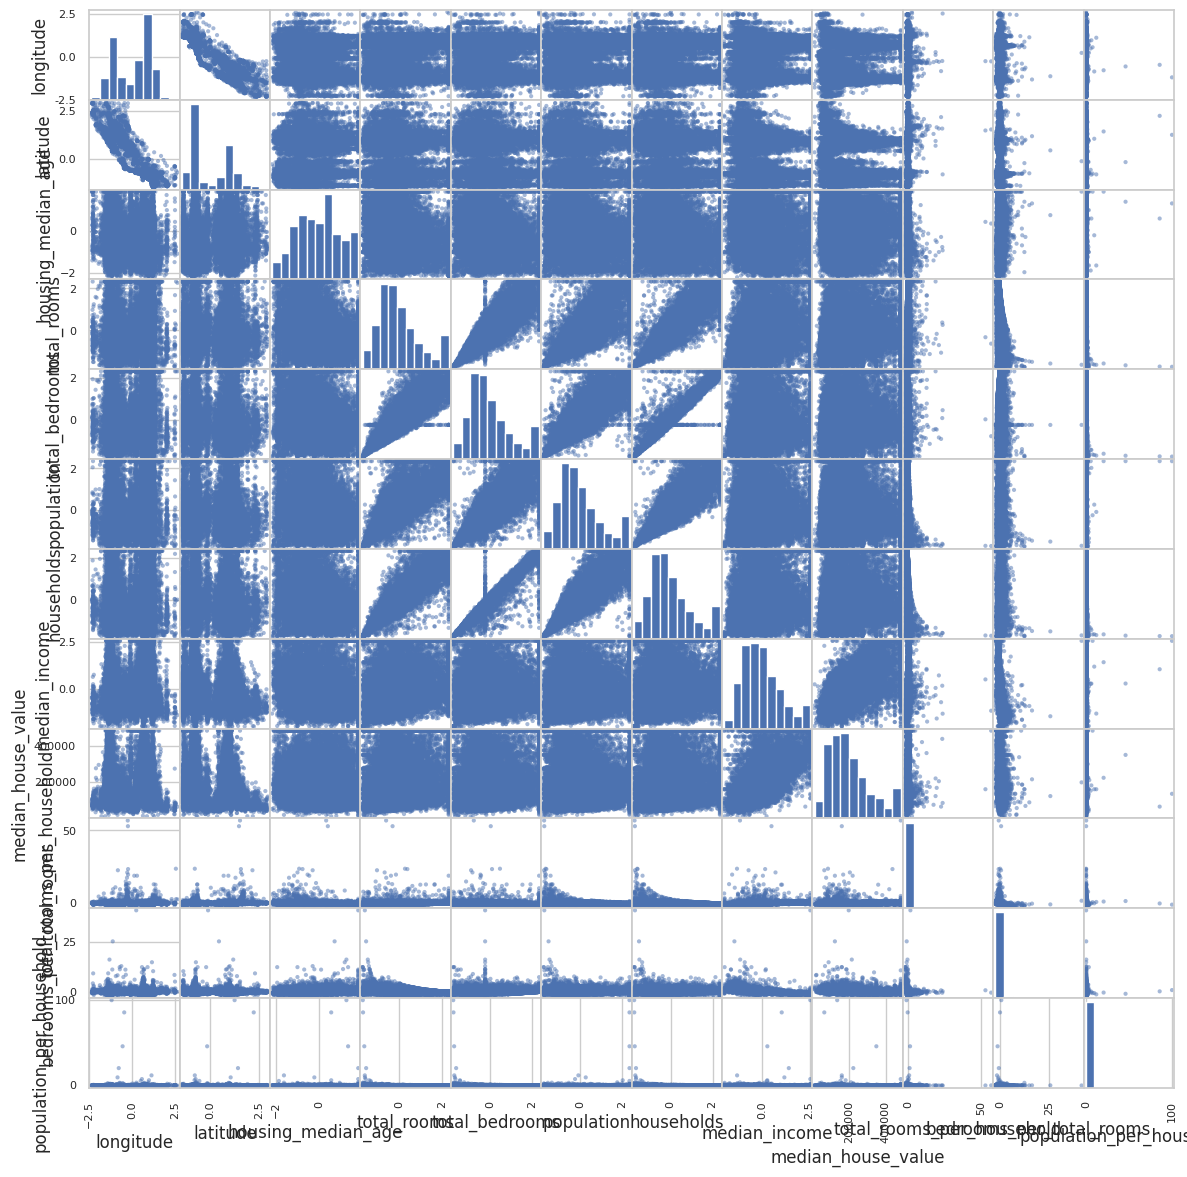

In [ ]:
scatter_matrix(df[numerical_variables], figsize=(14,14))

This scatter plot which plots all the numerical attributes against with another numerical attribute also showing a histogram for each of the numerical attributes.

Our analysis suggests that median income is the most promising independent variable for predicting the median house value. Let's visualize this relationship using a scatter plot to further investigate the correlation between these two variables.

<Axes: xlabel='median_income', ylabel='median_house_value'>

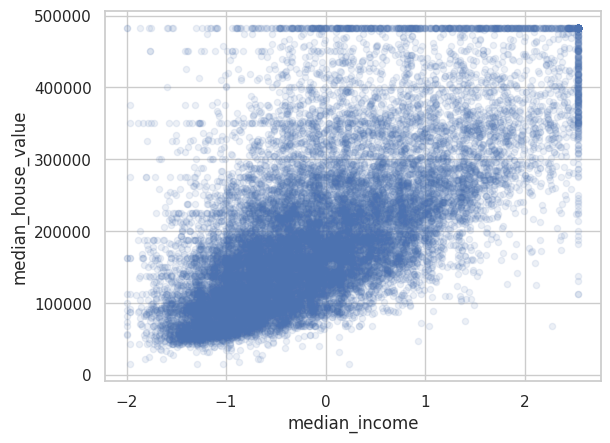

In [ ]:
df.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

This plot reveals the correlation is indeed very strong and can see an upward trend along with positive correlation.

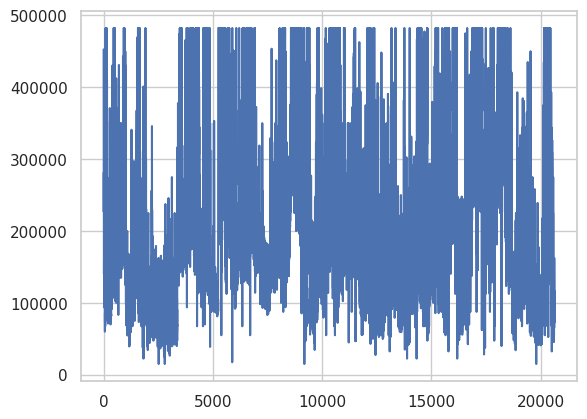

In [ ]:
df['median_house_value'].plot()
plt.show()

The above is a line plot of median_house_value. The variation in the line indicates that the ‘median_house_value’ varies quite a bit. There are peaks where the value is high and troughs where the value is low.

# **Model Selection**

**Problem Trying To Solve**

We're attempting to solve a regression problem. Our goal is to predict the continuous numerical variable 'median_house_price,' which represents the median value of houses, using the other numerical variables 'median_income', 'longitude,' 'latitude,' 'population', 'housing_median_age,' 'total_rooms', 'households', and 'total_bedrooms' together with the generated features "total_rooms_per_household", "population_per_household", "bedrooms_per_total_rooms"  and the categorical variable 'ocean_proximity.

**Chosen Machine Learning Algorithms**

The California housing dataset is a numerical dataset with multiple features such as 'median_income', 'longitude,' 'latitude,' 'population', 'housing_median_age,' 'total_rooms', 'households', and 'total_bedrooms' together with the generated features "total_rooms_per_household", "population_per_household", "bedrooms_per_total_rooms"  and the categorical variable 'ocean_proximity. In this context, the median house value serves as the target variable. This variable is continuous, meaning it can take on any value within a specific range. Given these characteristics, Linear Regression, Decision Tree Regression and Random Forest Regression are suitable.

**Linear Regression:**

Linear Regression is a basic and fast model, making it an excellent starting point for this task. This model can make decent predictions since the features in the dataset show a moderate correlation with the target variable. And because the data outliers have been addressed, the performance of Linear Regression will be good.

The input variables (longitude, latitude, housing median age, etc.) as well as the single output variable (median house value) are assumed to have a linear relationship in this algorithm. By combining various features in a specific linear equation, we can obtain an estimate of the median house value.




**Decision Tree Regression:**

Decision trees can handle both numerical and categorical data, which may be a suitable fit for our dataset, given ocean_proximity is a category variable.

A decision tree regression works well with large datasets, and our dataset has numerous entries.

It makes no assumptions about the distribution of variables because it splits the space according to the features. This is especially effective if the characteristics and the target variable have complex and non-linear relationships.

Without any explicit feature engineering, decision trees can capture interactions between distinct features. Houses with a big number of rooms, for example, may be more expensive, but only in particular areas.


**Random Forest Regression**

Random Forest is capable of detecting complicated feature relationships and non-linearities in data. It's an ensemble method that takes the outputs of numerous decision trees and averages them.

The dataset includes information such as median income, total rooms, and proximity to the coast, among other things. These characteristics may have intricate non-linear correlations with house values. Random Forests, as an ensemble of decision trees, can capture these non-linear interactions more efficiently compared to a single decision tree through enhancing generalization and lowering overfitting.

Random Forests provide a measure of feature importance, which can help you figure out which factors are driving the predictions. This can provide significant insight into the California home market.

Random Forests are intended to assist reduce overfitting, that is a frequent problem in decision trees.


# **Model Training and Evaluation**

To ensure the model generalizes well and delivers accurate predictions on future data, the data must be partitioned into distinct training and testing sets. This split-data approach enables the model to learn from past data while also providing an objective assessment of its predictive accuracy on unseen data.

**Splitting the Dataset to Training and Testing Sets**

In order to guarantee a model does not overfit to the training data and that it generalizes adequately to unseen data, 20% of the data in the dataset will be allotted to the testing set and 80% to the training set.

In [ ]:
# splitting the dataset into training and testing sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(f'Training set length: {len(train_set)}')
print(f'Test set length: {len(test_set)}')

Training set length: 16512
Test set length: 4128


The model will be trained on the training set (train_set) to learn the underlying outlines.

The test data is crucial for measuring the model'sgeneralizability and predictive accuracy.



We begin by separating the data into its features and the target variable.

In [ ]:
x = df.drop(['median_house_value'], axis=1).values
y = df['median_house_value'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'X Training set length: {len(x_train)}')
print(f'X Test set length: {len(x_test)}')
print(f'Y Training set length: {len(y_train)}')
print(f'Y Test set length: {len(y_test)}')

X Training set length: 16512
X Test set length: 4128
Y Training set length: 16512
Y Test set length: 4128


Based upon length of the trained set together with testing set, by adding them up it comes 20640 which was the same number as the rows we got initially. None of the rows was deleted as all information is valuable to the model.

**Training each Model on the Training Set**

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# coefficients of model
coefficients = lin_reg.coef_

print(coefficients)

[-53071.5897438  -53875.59329417  16279.27797869  -4532.96945994
  22630.58617701 -51544.88678314  38642.16241696  81440.77327086
   7224.04638907  19543.93704643    798.38995932 -16861.65441361
 -48179.32906064 107206.31551966 -26332.51891093 -15832.81313448]


In [ ]:
intercept =lin_reg.intercept_

print(intercept)

233597.24635239877


Here the intercept of 233,597.25 means that when all other features are zero, the predicted median house value is approximately $233,597.25.

**median_house_value** = 233597.24 + -53071.58* longitude + -53875.59* latitude + 16279.27* housing_median_age + -4532.96* total_rooms + 22630.58* total_bedrooms + -51544.88* population + 38642.16* households + 81440.77* median_income + 7224.04* total_rooms_per_household + 19543.93* bedrooms_per_total_rooms + 798.38* population_per_household + -16861.65* ocean_proximity_<1H OCEAN + -48179.32* ocean_proximity_INLAND + 107206.31* ocean_proximity_ISLAND + -26332.51* ocean_proximity_NEAR BAY + -15832.81* ocean_proximity_NEAR OCEAN

In [ ]:
#Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

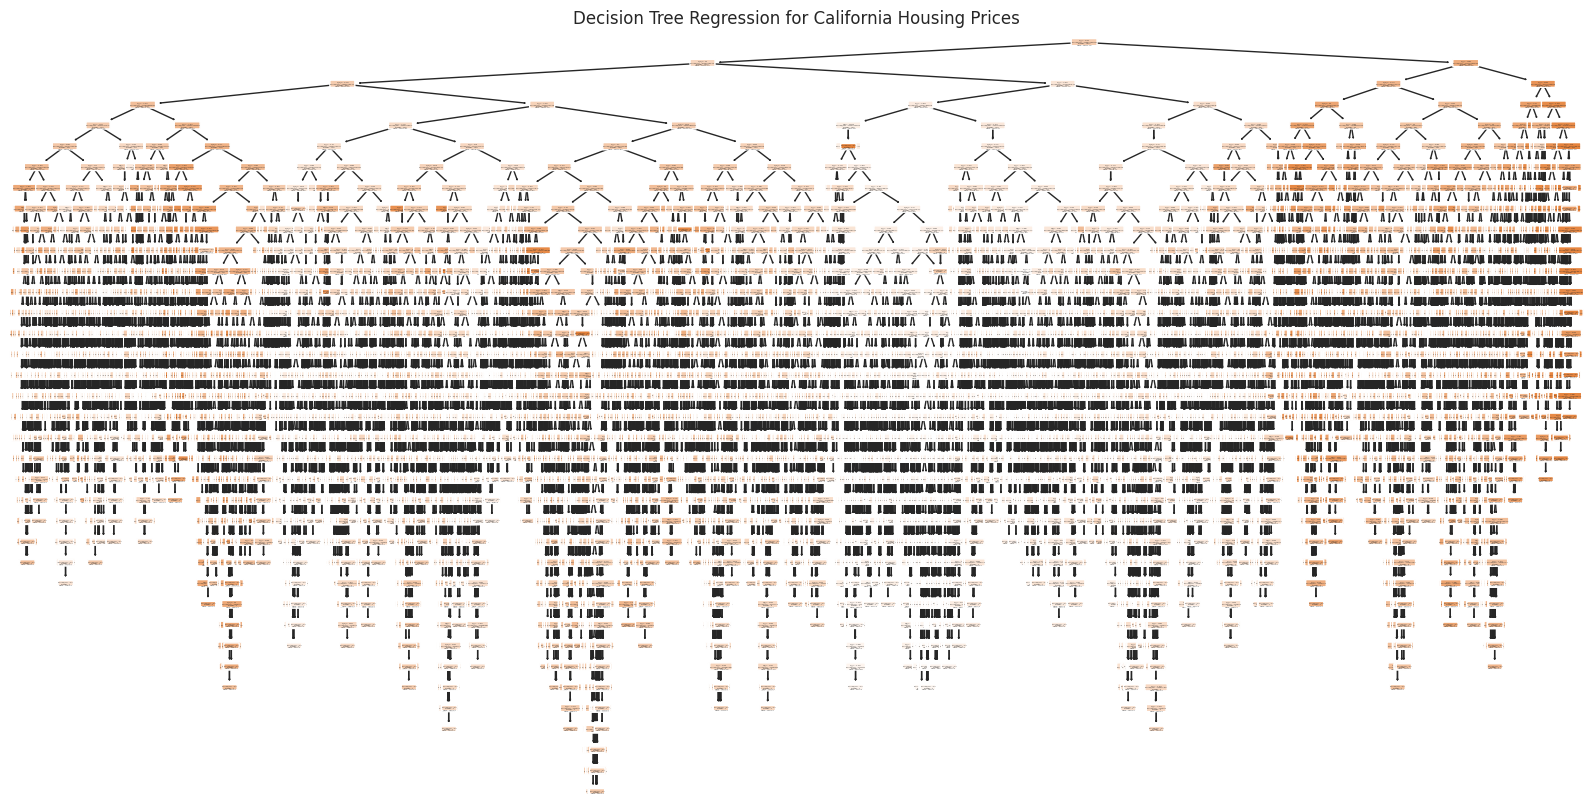

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, filled=True, rounded=True)
plt.title("Decision Tree Regression for California Housing Prices")
plt.show()

In [ ]:
#Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

**Predictions on the Training Set**

This was done to assess how well our model is learning from the data it was trained on and it helps to understand how closely our models are fitting on training data.

Predicting training set is a way to identify potential overfitting. When a machine learning model acquires from the data used for training too well, it captures outliers and other noise additionally to the core patterns, which is known as overfitting. A model that excels on training data but struggles with new data is likely overfitting. So, we are predicting on the training set to check how closely our models are fitting to their training data and to check if they’re overfitting.

Next, we predicted our 3 models to the training dataset.


In [ ]:
y_train_pred_linear_reg = lin_reg.predict(x_train)
y_train_pred_decision_tree = tree_reg.predict(x_train)
y_train_pred_forest_reg =  forest_reg.predict(x_train)

**Predictions on the Test Set**

Predicting on the test set is the cornerstone of evaluating machine learning model performance. This crucial step assesses how well our trained models generalize to new, unseen data. In other words, it allows us to gauge their ability to perform beyond the specific data they were trained on, thus providing a more realistic and reliable indication of their real-world effectiveness. Test dataset serves as a proxy for real-world scenarios, and evaluating the models on this set provides an estimate of its performance on data it has not encountered during training.

Critical to model evaluation, predictions on the test set enable us to assess its performance using various metrics. These metrics, including accuracy, MSE, RMSE, MAE, and R2 (or the determination coefficient), offer important insights into what the model excels at and where it falls short.


In [ ]:
y_test_pred_linear_reg = lin_reg.predict(x_test)
y_test_pred_decision_tree = tree_reg.predict(x_test)
y_test_pred_forest_reg =  forest_reg.predict(x_test)

**Evaluating the Performance by Appropriate Metrics**

Evaluating model performance through appropriate metrics is critical to assess the extent to which the model generalizes to unknown data, comparison of metrics by models helps us to choose the best-performing model among different algorithms and to reveal the machine learning model’s true performance on unseen data.

**Accuracy**

Accuracy is a measure that measures the portion of the dependent variable's variance clarified by the independent variables, and this is measured through R-squared.

In [ ]:
#Accuracy of Linear Regression for Testing Set
result = lin_reg.score(x_test, y_test)
print("Accuracy of Linear Regression for Testing Set: %.3f%%" % (result*100.0))

Accuracy of Linear Regression for Testing Set: 59.870%


Using the score function for the testing model, we received an output as Accuracy of Linear Regression for Testing Set: 59.870%.

The independent variables explain approximately 59.87% of variation observed at dependent variable, as evidenced by R2 score 0.5987.



In [ ]:
#Accuracy of Decision Tree Regression for Testing Set
result = tree_reg.score(x_test, y_test)
print("Accuracy of Decision Tree Regression for Testing Set: %.3f%%" % (result*100.0))

Accuracy of Decision Tree Regression for Testing Set: 62.534%


Using score function to the testing model, we received an output as Accuracy of Decision Tree Regression for Testing Set: 62.534%.

The independent variables explain approximately 62.53% of variation observed at dependent variable, as evidenced by R2 score 0.62534.



In [ ]:
#Accuracy of Random Forest Regression for Testing Set
result = forest_reg.score(x_test, y_test)
print("Accuracy of Random Forest Regression for Testing Set: %.3f%%" % (result*100.0))

Accuracy of Random Forest Regression for Testing Set: 80.598%


Using score function to the testing model, we received an output as Accuracy of Random Forest Regression for Testing Set: 80.598%.

The independent variables explain approximately 80.59% of variation observed at dependent variable, as evidenced by R2 score 0.8059.


Among the assessed models, Random Forest Regression outperforms both Linear Regression and Decision Tree Regression in explaining the variance in the data, suggesting it captures the underlying patterns more accurately and establishes itself as the preferred choice for this regression task.

*Mean Square Error (MSE)*

By calculating the average squared difference between predicted and actual values, the MSE metric offers a single, easily interpretable indicator of model performance. Lower MSE values are desirable, with zero representing a model that perfectly predicts all data points.

In [ ]:
# MSE for Linear Regression for Testing Set
linear_mse = mean_squared_error(y_test, y_test_pred_linear_reg)
print(f'Linear Regression Mean Squared Error for Testing Set: {linear_mse}')

Linear Regression Mean Squared Error for Testing Set: 5073921403.398409


We received an output as the Linear Regression Mean Squared Error for Testing Set: 5073921403.398409.

The significant average deviation between predicted and actual values for unseen data, as evidenced by the high MSE of the linear regression model, suggests that the model may not be suitable for accurate predictions on new data points suggesting that the model's predictions tend to deviate substantially from the true values on average.




In [ ]:
# MSE for Decision Tree Regressor for Testing Set
tree_reg_mse = mean_squared_error(y_test, y_test_pred_decision_tree)
print(f'Decision Tree Regression Mean Squared Error for Testing Set: {tree_reg_mse}')

Decision Tree Regression Mean Squared Error for Testing Set: 4737066798.477108


We received an output as the Decision Tree Regression Mean Squared Error for Testing Set: 4737066798.477108.

With an MSE of 4.74 billion on the testing set, the Decision Tree model exhibits similar behavior to the Linear Regression model, showing large differences between its predictions and actual values for new data.




In [ ]:
# MSE for Random Forest Regressor for Testing Set
forest_reg_mse = mean_squared_error(y_test, y_test_pred_forest_reg)
print(f'Random Forest Regression Mean Squared Error for Testing Set: {forest_reg_mse}')

Random Forest Regression Mean Squared Error for Testing Set: 2453097729.9302797


We received an output as the Random Forest Regression Mean Squared Error for Testing Set: 2453097729.9302797.

The Random Forest model achieves a lower MSE of 2.45 billion on the testing set, demonstrating its ability to make better predictions than the other models with smaller average errors for unseen data.



A model with lower MSE performs better, and Random Forest stands out with the lowest MSE, leading to more accurate predictions for median house values.

*Root Mean Square Error (RMSE)*

RMSE provides a convenient way to assess prediction accuracy by measuring the typical magnitude of errors between predicted and actual values. Since it shares the same units as the target variable, it's easy to interpret and understand. Smaller RMSE values indicate superior model performance, with zero representing perfect, error-free predictions.

In [ ]:
# RMSE for Linear Regression for Testing Set
lin_rmse = np.sqrt(linear_mse)
print(f"Linear Regression RMSE for Testing Set: {lin_rmse}")

Linear Regression RMSE for Testing Set: 71231.46357754001


We received an output as the Linear Regression RMSE for Testing Set: 71231.46357754001.

The RMSE of the Linear Regression model on the testing set highlights that its predictions, on average, are off by around 71,231 units of the target variable compared to the actual values.




In [ ]:
# RMSE for Decision Tree Regressor for Testing Set
tree_rmse = np.sqrt(tree_reg_mse)
print(f"Decision Tree RMSE for Testing Set: {tree_rmse}")

Decision Tree RMSE for Testing Set: 68826.35250016602


We received an output as the Decision Tree RMSE for Testing Set: 68826.35250016602.

The Decision Tree model's RMSE of 68,826 on the testing set provides valuable insight into its performance by quantifying the average deviation between its predictions and the actual values. Notably, lower RMSE values signify better predictive accuracy, highlighting the need to compare this value to other models for a more comprehensive evaluation.




In [ ]:
# RMSE for Random Forest Regressor for Testing Set
forest_reg_rmse = np.sqrt(forest_reg_mse)
print(f"Random Forest RMSE for Testing Set: {forest_reg_rmse}")

Random Forest RMSE for Testing Set: 49528.75659584319


We received an output as the Random Forest RMSE for Testing Set: 49528.75659584319.

The observed RMSE of 49,529 for the Random Forest model on the testing set provides evidence of its relatively good performance on unseen data. This metric, expressed in the same units as the target variable, indicates that the model's predictions, on average, deviate from the actual values by approximately 49,529 units, highlighting its generalizability and potential for accurate predictions in similar contexts.



Lower Root Mean Squared Error (RMSE) indicates superior model performance, and the Random Forest Regression model demonstrably outperforms both Linear Regression and Decision Tree Regression in reducing the deviation of predicted and actual figures to exhibits greater accurateness in predicting the target variable within the dataset.

*Mean Absolute Error (MAE)*

A direct and interpretable measure of prediction accuracy, MAE calculates the average absolute difference between predicted and actual values in the same units as the target variable, making it easy to understand how much the model's predictions deviate from the true values on average. Lower MAE values signify superior model performance, indicating greater accuracy in capturing the true values.

In [ ]:
# MAE for Linear Regression for Testing Set
linear_mae = mean_absolute_error(y_test, y_test_pred_linear_reg)
print(f'Linear Regression Mean Absolute Error for Testing Set: {linear_mae}')

Linear Regression Mean Absolute Error for Testing Set: 50644.43131908255


We received an output as the Linear Regression Mean Absolute Error for Testing Set: 50644.43131908255.

The Linear Regression model shows an average difference of 50,644 units between its predictions and the actual values on the testing set, as measured by the MAE. Lower MAE values are associated with better model performance, suggesting the need for further improvement in the model's accuracy.




In [ ]:
# MAE for Decision Tree Regressor for Testing Set
tree_reg_mae = mean_absolute_error(y_test, y_test_pred_decision_tree)
print(f'Decision Tree Regression Mean Absolute Error for Testing Set: {tree_reg_mae}')

Decision Tree Regression Mean Absolute Error for Testing Set: 43347.995639534885


We received an output as the Decision Tree Regression Mean Absolute Error for Testing Set: 43347.995639534885.

With an MAE of 43,348 on the testing set, the Decision Tree model shows an average difference of 43,348 units between its predictions and the actual values. Lower MAE values are associated with better model performance, suggesting the need for further improvement in the model's accuracy.



In [ ]:
# MAE for Random Forest Regressor for Testing Set
forest_reg_mae = mean_absolute_error(y_test, y_test_pred_forest_reg)
print(f'Random Forest Regression Mean Absolute Error for Testing Set: {forest_reg_mae}')

Random Forest Regression Mean Absolute Error for Testing Set: 32293.295285852713


We received an output as the Random Forest Regression Mean Absolute Error for Testing Set: 32293.295285852713.

The Random Forest model exhibits strong performance in predicting unseen data points, with an average absolute error of 32,293 units on the testing set. This low MAE value suggests that the model's predictions are close to the true values, highlighting its effectiveness in absolute terms.



The observed lower MAE of the Random Forest model highlights its superior performance in minimizing absolute prediction errors for median house values, demonstrating its effectiveness and generalizability

*R-square (Coefficient of Determination)*

R-squared, also known as the Coefficient of Determination, is a measure of how well a regression
model fits the data. It ranges from 0 to 1, where 0 means the model doesn't explain the data at all
and 1 means it explains all the data. Higher R-squared values indicate better fit, while lower values
suggest the model might not be effectively capturing the data's variability.

In [ ]:
# R-square for Linear Regression for Testing Set
linear_r2 = r2_score(y_test, y_test_pred_linear_reg)
print(f'Linear Regression R-square for Testing Set: {linear_r2}')

Linear Regression R-square for Testing Set: 0.59869523957395


Using the r2_score function for the testing model, we received output as the Linear Regression R-square for Testing Set: 0.59869523957395.

With an R-squared of 0.599 on the testing set, the Linear Regression model demonstrates
its ability to capture nearly 60% of the variability in the dependent variable, suggesting a
good fit between the model and the actual data points.

In [ ]:
# R-square for Decision Tree Regressor for Testing Set
tree_reg_r2 = r2_score(y_test, y_test_pred_decision_tree)
print(f'Decision Tree Regression R-square for Testing Set: {tree_reg_r2}')

Decision Tree Regression R-square for Testing Set: 0.6253376224133478


Using the r2_score function for the testing model, we received output as the Decision Tree Regression R-square for Testing Set: 0.6253376224133478.

With an R-squared of 0.625, the Decision Tree model demonstrates its effectiveness in
explaining the dependent variable's variance, capturing approximately 62.5% of the
variability within the testing data. This suggests a relatively good fit and potentially
accurate predictions



In [ ]:
# R-square for Random Forest Regressor for Testing Set
forest_reg_r2 = r2_score(y_test, y_test_pred_forest_reg)
print(f'Random Forest Regression R-square for Testing Set: {forest_reg_r2}')

Random Forest Regression R-square for Testing Set: 0.8059804796834258


Using the r2_score function for the testing model, we received output as the Random Forest Regression R-square for Testing Set: 0.8059804796834258.

With an impressive R-squared of 0.806, the Random Forest model demonstrates its strong
fit to the data by explaining approximately 80.6% of the observed variability within the
testing set. This suggests that the model effectively captures the relationship between the
independent and dependent variables, providing valuable insights into the underlying
patterns and dynamics.



The observed higher R-squared value for the Random Forest model highlights its superior
performance in explaining the dependent variable's variance compared to both Linear and
Decision Tree models. This suggests that the Random Forest model captures a significantly
larger portion of the variability within the testing set, solidifying its generalizability and potential
for accurate predictions.


Random Forest Model is the preferred model as,

• The Random Forest Regression model consistently beats both Linear Regression and
Decision Tree Regression across all evaluated metrics.

•	The model furnishes more precise predictions, captures a greater proportion of the variance, and minimizes both squared and absolute differences between predicted and actual values on the testing set.

•	Random Forest Regression is the preferred model for this regression task based on the comprehensive evaluation of R-squared, MSE, RMSE, and MAE metrics.


**Analysis of Overfitting or Underfitting**

Analyzing overfitting or underfitting is crucial in machine learning to understand how well a model generalizes to new, unseen data. Overfitting and underfitting are common issues that can impact a model's performance, and addressing these problems is essential for building robust and accurate models. Using the performance metrics of training and testing sets, by comparing them we can find if a particular model is overfitting or underfitting.

*Linear Regression:*

In [ ]:
# MSE for Linear Regression for Training Set
linear_mse_train = mean_squared_error(y_train, y_train_pred_linear_reg)
print(f'Linear Regression Mean Squared Error for Training Set: {linear_mse_train}')

Linear Regression Mean Squared Error for Training Set: 4107752878.2115293


In [ ]:
# MSE for Linear Regression for Testing Set
print(f'Linear Regression Mean Squared Error for Testing Set: {linear_mse}')

Linear Regression Mean Squared Error for Testing Set: 5073921403.398409


The MSE for the training set is lower than the MSE for the testing set, indicating that the model operates superior on the data used to train it. However, the absolute values of MSE are relatively high, suggesting that there is still a significant amount of variance unaccounted for in both sets.

In [ ]:
# RMSE for Linear Regression for Training Set
lin_rmse_train = np.sqrt(linear_mse_train)
print(f"Linear Regression RMSE for Training Set: {lin_rmse_train}")

Linear Regression RMSE for Training Set: 64091.75358976792


In [ ]:
# RMSE for Linear Regression for Testing Set
print(f"Linear Regression RMSE for Testing Set: {lin_rmse}")

Linear Regression RMSE for Testing Set: 71231.46357754001


The RMSE for the training set is less than that for the testing set, similar to MSE. A smaller RMSE is preferable, and the model appears to be more accurate on the training set than on the testing set.

In [ ]:
# MAE for Linear Regression for Training Set
linear_mae_train = mean_absolute_error(y_train, y_train_pred_linear_reg)
print(f'Linear Regression Mean Absolute Error for Training Set: {linear_mae_train}')

Linear Regression Mean Absolute Error for Training Set: 47603.893776045705


In [ ]:
# MAE for Linear Regression for Testing Set
print(f'Linear Regression Mean Absolute Error for Testing Set: {linear_mae}')

Linear Regression Mean Absolute Error for Testing Set: 50644.43131908255


The MAE values follow a similar pattern, with the training set having a lower MAE than the testing set. This means that on average, the model's forecasts deviate less from the real numbers on the training set.

In [ ]:
# R-square for Linear Regression for Training Set
linear_r2_train = r2_score(y_train, y_train_pred_linear_reg)
print(f'Linear Regression R-square for Training Set: {linear_r2_train}')

Linear Regression R-square for Training Set: 0.6805921802023261


In [ ]:
# R-square for Linear Regression for Testing Set
print(f'Linear Regression R-square for Testing Set: {linear_r2}')

Linear Regression R-square for Testing Set: 0.59869523957395


When the model fits the training data better than the testing data, it suggests overfitting has occurred. This means the model is capturing noise and nuances specific to the training set and isn't generalizing well to unseen data.

The linear regression model fits the training data better than the testing data. This suggests that the model is overfitting to the training set, meaning it is capturing noise and nuances specific to the training set and isn't generalizing well to unseen data.

*Decision Tree Regression:*

In [ ]:
# MSE for Decision Tree Regressor for Training Set
tree_reg_mse_train = mean_squared_error(y_train, y_train_pred_decision_tree)
print(f'Decision Tree Regression Mean Squared Error for Training Set: {tree_reg_mse_train}')

Decision Tree Regression Mean Squared Error for Training Set: 0.0


In [ ]:
# MSE for Decision Tree Regressor for Testing Set
print(f'Decision Tree Regression Mean Squared Error for Testing Set: {tree_reg_mse}')

Decision Tree Regression Mean Squared Error for Testing Set: 4737066798.477108


The model achieves a perfect fit on the training data, indicated by an MSE of 0.0. However, its performance on the testing set suggests it cannot generalize well to unseen data. This disparity in performance implies potential overfitting.

In [ ]:
# RMSE for Decision Tree Regressor for Training Set
tree_rmse_train = np.sqrt(tree_reg_mse_train)
print(f"Decision Tree RMSE for Training Set: {tree_rmse_train}")

Decision Tree RMSE for Training Set: 0.0


In [ ]:
# RMSE for Decision Tree Regressor for Testing Set
print(f"Decision Tree RMSE for Testing Set: {tree_rmse}")

Decision Tree RMSE for Testing Set: 68826.35250016602


A RMSE of 0.0 on the training set implies that the model perfectly predicts all training values. However, the high RMSE on the testing set indicates poor generalization, reinforcing that the model may be overfitting.

In [ ]:
# MAE for Decision Tree Regressor for Training Set
tree_reg_mae_train = mean_absolute_error(y_train, y_train_pred_decision_tree)
print(f'Decision Tree Regression Mean Absolute Error for Training Set: {tree_reg_mae_train}')

Decision Tree Regression Mean Absolute Error for Training Set: 0.0


In [ ]:
# MAE for Decision Tree Regressor for Testing Set
print(f'Decision Tree Regression Mean Absolute Error for Testing Set: {tree_reg_mae}')

Decision Tree Regression Mean Absolute Error for Testing Set: 43347.995639534885


A MAE of 0.0 on the training set means perfect predictions, whereas a somewhat high MAE on the testing set indicates that the model's forecasts depart from the real values on new data.

In [ ]:
# R-square for Decision Tree Regressor for Training Set
tree_reg_r2_train = r2_score(y_train, y_train_pred_decision_tree)
print(f'Decision Tree Regression R-square for Training Set: {tree_reg_r2_train}')

Decision Tree Regression R-square for Training Set: 1.0


In [ ]:
# R-square for Decision Tree Regressor for Testing Set
print(f'Decision Tree Regression R-square for Testing Set: {tree_reg_r2}')

Decision Tree Regression R-square for Testing Set: 0.6253376224133478


On the training set, a perfect R-square shows that the model explains all of the variation in the target variable. The lower R-square on the testing set, on the other hand, shows that the model fails to apply as well to fresh data.

The decision tree regression model overfits the training data, as evidenced by its perfect performance on the training set and poor performance on the testing set. This means that the model is learning the specific patterns in the training data to the point where it cannot generalize to new data.

*Random Forest Regression:*

In [ ]:
# MSE for Random Forest Regressor for Training Set
forest_reg_mse_train = mean_squared_error(y_train, y_train_pred_forest_reg)
print(f'Random Forest Regression Mean Squared Error for Training Set: {forest_reg_mse_train}')

Random Forest Regression Mean Squared Error for Training Set: 328473942.96834373


In [ ]:
# MSE for Random Forest Regressor for Testing Set
print(f'Random Forest Regression Mean Squared Error for Testing Set: {forest_reg_mse}')

Random Forest Regression Mean Squared Error for Testing Set: 2453097729.9302797


The model's excellent performance on training data, coupled with its dismal performance on unseen data, serves as a red flag for overfitting. This is further strengthened by the substantial error metrics on the testing set, highlighting the model's failure to generalize to new data effectively.

In [ ]:
# RMSE for Random Forest Regressor for Training Set
forest_reg_rmse_train = np.sqrt(forest_reg_mse_train)
print(f"Random Forest RMSE for Training Set: {forest_reg_rmse_train}")

Random Forest RMSE for Training Set: 18123.85011437536


In [ ]:
# RMSE for Random Forest Regressor for Testing Set
print(f"Random Forest RMSE for Testing Set: {forest_reg_rmse}")

Random Forest RMSE for Testing Set: 49528.75659584319


The RMSE numbers are relatively small, showing that the algorithm's forecasts have a small average magnitude of error. This suggests good predictive accuracy on both training and testing sets.

In [ ]:
# MAE for Random Forest Regressor for Training Set
forest_reg_mae_train = mean_absolute_error(y_train, y_train_pred_forest_reg)
print(f'Random Forest Regression Mean Absolute Error for Training Set: {forest_reg_mae_train}')

Random Forest Regression Mean Absolute Error for Training Set: 11817.80988402374


In [ ]:
# MAE for Random Forest Regressor for Testing Set
print(f'Random Forest Regression Mean Absolute Error for Testing Set: {forest_reg_mae}')

Random Forest Regression Mean Absolute Error for Testing Set: 32293.295285852713


The MAE values are modest, showing that the algorithm's forecasts have average absolute deviations from the actual values.  This implies that the prognosis is accurate.

In [ ]:
# R-square for Random Forest Regressor for Training Set
forest_reg_r2_train = r2_score(y_train, y_train_pred_forest_reg)
print(f'Random Forest Regression R-square for Training Set: {forest_reg_r2_train}')

Random Forest Regression R-square for Training Set: 0.9744587493224413


In [ ]:
# R-square for Random Forest Regressor for Testing Set
print(f'Random Forest Regression R-square for Testing Set: {forest_reg_r2}')

Random Forest Regression R-square for Testing Set: 0.8059804796834258


The high R-square values indicate that the prediction model accounts for a significant percentage of the volatility in both the training and testing sets. The model demonstrates strong predictive performance on both datasets.

The Random Forest Regression model demonstrates strong performance across both training and testing data. The testing set's relatively low MSE, RMSE, and MAE values imply that the model extends well to new, data that was previously unknown. The high R-square values suggest that the model accounts for a significant percentage of the variability in the target variable across both the training and testing datasets. Random Forest Regression looks to be a stable model, producing accurate and generalized predictions for the target variable.

Therefore, in conclusion we can see that,

•	Linear Regression exhibits overfitting since it works well on the training set but not so well on the testing set.

•	Decision Tree Regression overfits the training data, providing a perfect fit but poor generalization to new data.

•	Random Forest Regression outperforms both models, demonstrating strong performance on both training and testing sets, indicating good generalization and predictive accuracy. It appears to be a robust and preferred model for this regression task.


# **Hyperparameter Tuning**

**Hyperparameter Tuning the Chosen Models to Improve Performance**

*Linear Regression:*

There aren't many hyperparameters to tweak for Linear Regression. The model is rather simple. Using cross-validated grid search, we efficiently explore multiple choices for the fit_intercept parameter in Linear Regression and identify the combination that minimizes the negative mean squared error.

In [ ]:
# Hyperparameter tuning for Linear Regression
param_grid_linear_reg = {'fit_intercept': [True, False]}
grid_search_linear_reg = GridSearchCV(LinearRegression(), param_grid_linear_reg, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_linear_reg.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

*Decision Tree:*

To fine-tune the hyperparameters for Decision Tree Regression, we can utilize GridSearchCV from sklearn.model_selection. Grid search is a technique for altering hyperparameters to discover the optimal values for a specific model. This is significant since the performance of the entire model is determined by the hyperparameter values. It conducts a thorough search of the hyperparameter grid. It trains a Decision Tree model for each combination of hyperparameters using 5-fold cross-validation and computes the negative mean squared error for each fold.

In [ ]:
# Hyperparameter tuning for Decision Tree
param_grid = [
    {'max_depth': [None, 10, 30, 50], 'min_samples_split': [2, 4, 6, 8]},
]

grid_search_tree = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [None, 10, 30, 50],
                          'min_samples_split': [2, 4, 6, 8]}],
             return_train_score=True, scoring='neg_mean_squared_error')

*Random Forest:*

The Random Forest Regressor's hyperparameters are then tuned via grid search. This is significant since the performance of the entire model is determined by the hyperparameter values.

In [ ]:
# Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search_forest.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

**Best Combination of Parameters Found**

After performing the grid search, we can get the best combination of parameters.

*Linear Regression:*

In [ ]:
best_params_linear_reg = grid_search_linear_reg.best_params_
best_params_linear_reg

{'fit_intercept': False}

The optimal parameters for the linear regression model were discovered when 'fit_intercept' was set to False.The fit_intercept argument is a Boolean (True by default) that determines whether the intercept b0 is calculated (True) or considered equal to zero (False). When set to False, the regression line passes through the origin, indicating that the model lacks an intercept.

And the best estimator directly is:

In [ ]:
grid_search_linear_reg.best_estimator_

LinearRegression(fit_intercept=False)

*Decison Tree:*

In [ ]:
best_params_decision_tree = grid_search_tree.best_params_
best_params_decision_tree

{'max_depth': 10, 'min_samples_split': 8}

According to the grid search with cross-validation hyperparameter tuning, the optimum hyperparameters for the Decision Tree Regression model are:

max_depth: 10

min_samples_split: 8


max_depth: This parameter determines the maximum depth of the tree. From the root to the farthest leaf node, a tree with a depth of 10 comprises 10 layers of nodes. Higher depth enables the model to develop extremely specific relationships to a particular sample, which aids in over-fitting management.

min_samples_split: This setting determines the minimum number of data points needed to split a node in the tree. Only nodes with at least 8 instances can be split, ensuring accurate classification and preventing overfitting. Higher values prevent the algorithm from learning relationships that are too specific to the training data.


And the best estimator directly is:

In [ ]:
grid_search_tree.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_split=8, random_state=42)

*Random Forest:*

In [ ]:
best_params_random_forest = grid_search_forest.best_params_
best_params_random_forest

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

The optimum hyperparameters for the Random Forest Regression model are:

max_depth: None,

 min_samples_leaf: 2,

 min_samples_split: 2,

 n_estimators: 200

'max_depth': None - The trees in the Random Forest have grown completely and uncut. Each tree in the forest may develop until all of its leaves are clean or have less samples than min_samples_split.

min_samples_leaf': 2 - To prevent overfitting in decision trees, especially when used for regression, a minimum of two training samples is required at each leaf node, including those at greater depths. This ensures sufficient data is present for accurate predictions at all levels of the tree.

With the min_samples_split parameter set to 2, the decision tree algorithm continues splitting internal nodes until either of two conditions is met: 1) all leaf nodes contain fewer than two samples, or 2) all leaf nodes are pure, meaning they only contain data points belonging to the same class.

The number of trees in the forest is given by 'n_estimators': 200. The bigger the value, the longer it will take to compute. Furthermore, after a certain number of trees, the findings will no longer improve considerably.


And the best estimator directly is:

In [ ]:
grid_search_forest.best_estimator_

RandomForestRegressor(min_samples_leaf=2, n_estimators=200, random_state=42)

**Updating Models With Best Parameters**

In [ ]:
# Updated Linear Regression model with best hyperparameters
best_linear_reg_model = grid_search_linear_reg.best_estimator_

In [ ]:
# Updated Decision Tree model with best hyperparameters
best_decision_tree_model = grid_search_tree.best_estimator_

In [ ]:
# Updated Random Forest model with best hyperparameters
best_random_forest_model = grid_search_forest.best_estimator_

**Predictions on Test Set After Hyperparameter Tuning**

In [ ]:
y_test_pred_linear_reg_tuned = best_linear_reg_model.predict(x_test)
y_test_pred_decision_tree_tuned = best_decision_tree_model.predict(x_test)
y_test_pred_forest_reg_tuned = best_random_forest_model.predict(x_test)

**Comparing Performance Before and After Hyperparameter Tuning**

*Mean Square Error (MSE)*

In [ ]:
# After Hyperparameter Tuning Linear Regression MSE
linear_mse_tuned = mean_squared_error(y_test, y_test_pred_linear_reg_tuned)
print(f'After Hyperparameter Tuning Linear Regression MSE: \n{linear_mse_tuned}')

After Hyperparameter Tuning Linear Regression MSE: 
5073921403.398415


That means that the mean squared difference between expected and real median house values is about 5.07 billion. This implies a moderate level of error in the linear regression model's predictions.

In [ ]:
# After Hyperparameter Tuning Decision Tree Regression MSE
tree_reg_mse_tuned = mean_squared_error(y_test, y_test_pred_decision_tree_tuned)
print(f'After Hyperparameter Tuning Decision Tree Regression MSE: \n{tree_reg_mse_tuned}')

After Hyperparameter Tuning Decision Tree Regression MSE: 
3800248746.566792


While the decision tree regression model boasts a slightly lower mean squared error (MSE) than linear regression, both models exhibit moderate levels of error in their predictions. The mean of the squared discrepancy between predicted and real median house data sits at approximately 3.8 billion, indicating the need for further refinement in either approach.

In [ ]:
# After Hyperparameter Tuning Random Forest Regression MSE
forest_reg_mse_tuned = mean_squared_error(y_test, y_test_pred_forest_reg_tuned)
print(f'After Hyperparameter Tuning Random Forest Regression MSE: \n{forest_reg_mse_tuned}')

After Hyperparameter Tuning Random Forest Regression MSE: 
2391105511.23047


The MSE of the random forest regression model is much lower than that of linear regression and decision tree regression. The mean square discrepancy between expected and real median house values is about 2.3 billion. This implies a moderate level of error in the linear regression model's predictions.

*Root Mean Square Error (RMSE)*

In [ ]:
# After Hyperparameter Tuning Linear Regression RMSE
lin_rmse_tuned = np.sqrt(linear_mse_tuned)
print(f'After Hyperparameter Tuning Linear Regression RMSE: \n{lin_rmse_tuned}')

After Hyperparameter Tuning Linear Regression RMSE: 
71231.46357754005


On average, the linear regression model's predictions for median house values were off by about $71,231.46.

In [ ]:
# After Hyperparameter Tuning Decision Tree Regression RMSE
tree_rmse_tuned = np.sqrt(tree_reg_mse_tuned)
print(f'After Hyperparameter Tuning Decision Tree Regression RMSE: \n{tree_rmse_tuned}')

After Hyperparameter Tuning Decision Tree Regression RMSE: 
61646.15759775131


he decision tree regression model's predictions deviated from the actual values by approximately $61,646.15, suggesting slightly higher accuracy compared to the linear regression model.

In [ ]:
# After Hyperparameter Tuning Random Forest Regression RMSE
forest_reg_rmse_tuned = np.sqrt(forest_reg_mse_tuned)
print(f'After Hyperparameter Tuning Random Forest Regression RMSE: \n{forest_reg_rmse_tuned}')

After Hyperparameter Tuning Random Forest Regression RMSE: 
48898.93159600187


Compared to linear regression and decision tree regression, the random forest regression model boasts a substantially lower RMSE of 48,898.93, highlighting its superior prediction accuracy.

*Mean Absolute Error (MAE)*

In [ ]:
# After Hyperparameter Tuning Linear Regression MAE
linear_mae_tuned = mean_absolute_error(y_test, y_test_pred_linear_reg_tuned)
print(f'After Hyperparameter Tuning Linear Regression MAE: \n{linear_mae_tuned}')

After Hyperparameter Tuning Linear Regression MAE: 
50644.43131908258


The absolute difference between projected and real median house values is around 50,644.43 on average. This represents the typical magnitude of inaccuracy in the linear regression model's predictions.

In [ ]:
# After Hyperparameter Tuning Decision Tree Regression MAE
tree_reg_mae_tuned = mean_absolute_error(y_test, y_test_pred_decision_tree_tuned)
print(f'After Hyperparameter Tuning Decision Tree Regression MAE: \n{tree_reg_mae_tuned}')

After Hyperparameter Tuning Decision Tree Regression MAE: 
39943.63543639071


Compared to linear regression, the decision tree regression model demonstrates a reduced mean absolute error (MAE) in the post-tuning phase, indicating superior prediction accuracy characterized by smaller absolute discrepancies between actual and predicted values.

In [ ]:
# After Hyperparameter Tuning Random Forest Regression MAE
forest_reg_mae_tuned = mean_absolute_error(y_test, y_test_pred_forest_reg_tuned)
print(f'After Hyperparameter Tuning Random Forest Regression MAE: \n{forest_reg_mae_tuned}')

After Hyperparameter Tuning Random Forest Regression MAE: 
31912.97863703209


The random forest model is significantly more accurate than both linear regression and decision tree regression, with an average absolute error of approximately 31,912.97. This suggests its superior prediction capabilities.

*R-square (Coefficient of Determination)*

In [ ]:
# After Hyperparameter Tuning Linear Regression R-square
linear_r2_tuned = r2_score(y_test, y_test_pred_linear_reg_tuned)
print(f'After Hyperparameter Tuning Linear Regression R-square: \n{linear_r2_tuned}')

After Hyperparameter Tuning Linear Regression R-square: 
0.5986952395739495


The post-parameter tuned linear regression model accounts for approximately 59.86% of the variance observed in median house values, suggesting a moderate level of explanatory power. This implies that the linear model captures roughly 63.11% of the variability exhibited by the target variable.

In [ ]:
# After Hyperparameter Tuning Decision Tree Regression R-square
tree_reg_r2_tuned = r2_score(y_test, y_test_pred_decision_tree_tuned)
print(f'After Hyperparameter Tuning Decision Tree Regression R-square: \n{tree_reg_r2_tuned}')

After Hyperparameter Tuning Decision Tree Regression R-square: 
0.6994320976712547


The decision tree model captures slightly more of the variance in median house values (69.94%) compared to linear regression, indicating similar explanatory power.

In [ ]:
# After Hyperparameter Tuning Random Forest Regression R-square
forest_reg_r2_tuned = r2_score(y_test, y_test_pred_forest_reg_tuned)
print(f'After Hyperparameter Tuning Random Forest Regression R-square: \n{forest_reg_r2_tuned}')

After Hyperparameter Tuning Random Forest Regression R-square: 
0.8108835458714325


The Random Forest model significantly outperforms both Linear Regression and Decision Tree Regression in explaining housing price variations, capturing about 81% of the volatility.

**Comaparison of Before and After Parameter Tuned Model**

In [ ]:
# Before Hyperparameter Tuning Linear Regression MSE
print(f'Before Hyperparameter Tuning Linear Regression MSE: \n{linear_mse}')

Before Hyperparameter Tuning Linear Regression MSE: 
5073921403.398409


In [ ]:
# After Hyperparameter Tuning Linear Regression MSE
print(f'After Hyperparameter Tuning Linear Regression MSE: \n{linear_mse_tuned}')

After Hyperparameter Tuning Linear Regression MSE: 
5073921403.398415


The hyperparameter tuning for Linear Regression did not lead to any improvement. The MSE remains the same before and after tuning. This suggests that, in this specific case, adjusting the hyperparameters did not result in a better fit for the linear regression model on the given dataset.

In [ ]:
# Before Hyperparameter Tuning Decision Tree Regression MSE
print(f'Before Hyperparameter Tuning Decision Tree Regression MSE: \n{tree_reg_mse}')

Before Hyperparameter Tuning Decision Tree Regression MSE: 
4737066798.477108


In [ ]:
# After Hyperparameter Tuning Decision Tree Regression MSE
print(f'After Hyperparameter Tuning Decision Tree Regression MSE: \n{tree_reg_mse_tuned}')

After Hyperparameter Tuning Decision Tree Regression MSE: 
3800248746.566792


The hyperparameter tuning for Decision Tree Regression resulted in a notable improvement. This suggests that the selected hyperparameters ({'max_depth': 10, 'min_samples_split': 8}) improved the decision tree model's capacity to recognize trends in training data.

In [ ]:
# Before Hyperparameter Tuning Random Forest Regression MSE
print(f'Before Hyperparameter Tuning Random Forest Regression MSE: \n{forest_reg_mse}')

Before Hyperparameter Tuning Random Forest Regression MSE: 
2453097729.9302797


In [ ]:
# After Hyperparameter Tuning Random Forest Regression MSE
print(f'After Hyperparameter Tuning Random Forest Regression MSE: \n{forest_reg_mse_tuned}')

After Hyperparameter Tuning Random Forest Regression MSE: 
2391105511.23047


The hyperparameter tuning for Random Forest Regression resulted in a slight increase in MSE.

In [ ]:
# Before Hyperparameter Tuning Linear Regression RMSE
print(f'Before Hyperparameter Tuning Linear Regression RMSE: \n{lin_rmse}')

Before Hyperparameter Tuning Linear Regression RMSE: 
71231.46357754001


In [ ]:
# After Hyperparameter Tuning Linear Regression RMSE
print(f'After Hyperparameter Tuning Linear Regression RMSE: \n{lin_rmse_tuned}')

After Hyperparameter Tuning Linear Regression RMSE: 
71231.46357754005


Similar to the MSE results, the hyperparameter tuning for Linear Regression did not result in a change in RMSE. The values remained the same before and after tuning, indicating that the selected hyperparameters did not improve the model's performance on the given dataset.

In [ ]:
# Before Hyperparameter Tuning Decision Tree Regression RMSE
print(f'Before Hyperparameter Tuning Decision Tree Regression RMSE: \n{tree_rmse}')

Before Hyperparameter Tuning Decision Tree Regression RMSE: 
68826.35250016602


In [ ]:
# After Hyperparameter Tuning Decision Tree Regression RMSE
print(f'After Hyperparameter Tuning Decision Tree Regression RMSE: \n{tree_rmse_tuned}')

After Hyperparameter Tuning Decision Tree Regression RMSE: 
61646.15759775131


The hyperparameter tuning for Decision Tree Regression led to a substantial improvement in RMSE. This suggests that the tuned hyperparameters ({'max_depth': 10, 'min_samples_split': 8}) resulted in a decision tree model that better captures the underlying patterns in the training data.

In [ ]:
# Before Hyperparameter Tuning Random Forest Regression RMSE
print(f'Before Hyperparameter Tuning Random Forest Regression RMSE: \n{forest_reg_rmse}')

Before Hyperparameter Tuning Random Forest Regression RMSE: 
49528.75659584319


In [ ]:
# After Hyperparameter Tuning Random Forest Regression RMSE
print(f'After Hyperparameter Tuning Random Forest Regression RMSE: \n{forest_reg_rmse_tuned}')

After Hyperparameter Tuning Random Forest Regression RMSE: 
48898.93159600187


The hyperparameter tuning for Random Forest Regression led to a slight increase in RMSE.

In [ ]:
# Before Hyperparameter Tuning Linear Regression MAE
print(f'Before Hyperparameter Tuning Linear Regression MAE: \n{linear_mae}')

Before Hyperparameter Tuning Linear Regression MAE: 
50644.43131908255


In [ ]:
# After Hyperparameter Tuning Linear Regression MAE
print(f'After Hyperparameter Tuning Linear Regression MAE: \n{linear_mae_tuned}')

After Hyperparameter Tuning Linear Regression MAE: 
50644.43131908258


Similar to RMSE and MSE, the hyperparameter tuning for Linear Regression did not result in a change in MAE. The values remained the same before and after tuning, indicating that the selected hyperparameters did not improve the model's performance on the given dataset.

In [ ]:
# Before Hyperparameter Tuning Decision Tree Regression MAE
print(f'Before Hyperparameter Tuning Decision Tree Regression MAE: \n{tree_reg_mae}')

Before Hyperparameter Tuning Decision Tree Regression MAE: 
43347.995639534885


In [ ]:
# After Hyperparameter Tuning Decision Tree Regression MAE
print(f'After Hyperparameter Tuning Decision Tree Regression MAE: \n{tree_reg_mae_tuned}')

After Hyperparameter Tuning Decision Tree Regression MAE: 
39943.63543639071


The hyperparameter tuning for Decision Tree Regression led to a notable improvement in MAE. The value decreased from 43,347.99 to 39,943.63 after tuning. This suggests that the tuned hyperparameters ({'max_depth': 10, 'min_samples_split': 8}) resulted in a decision tree model that makes more accurate predictions on the given dataset.

In [ ]:
# Before Hyperparameter Tuning Random Forest Regression MAE
print(f'Before Hyperparameter Tuning Random Forest Regression MAE: \n{forest_reg_mae}')

Before Hyperparameter Tuning Random Forest Regression MAE: 
32293.295285852713


In [ ]:
# After Hyperparameter Tuning Random Forest Regression MAE
print(f'After Hyperparameter Tuning Random Forest Regression MAE: \n{forest_reg_mae_tuned}')

After Hyperparameter Tuning Random Forest Regression MAE: 
31912.97863703209


The hyperparameter tuning for Random Forest Regression led to a slight increase in MAE.

In [ ]:
# Before Hyperparameter Tuning Linear Regression R-square
print(f'Before Hyperparameter Tuning Linear Regression R-square: \n{linear_r2}')

Before Hyperparameter Tuning Linear Regression R-square: 
0.59869523957395


In [ ]:
# After Hyperparameter Tuning Linear Regression R-square
print(f'After Hyperparameter Tuning Linear Regression R-square: \n{linear_r2_tuned}')

After Hyperparameter Tuning Linear Regression R-square: 
0.5986952395739495


The R-square value for Linear Regression remained the same before and after hyperparameter tuning, indicating that the selected hyperparameters did not have a significant impact on the model's ability to explain the discrepancy in the Y variable.

In [ ]:
# Before Hyperparameter Tuning Decision Tree Regression R-square
print(f'Before Hyperparameter Tuning Decision Tree Regression R-square: \n{tree_reg_r2}')

Before Hyperparameter Tuning Decision Tree Regression R-square: 
0.6253376224133478


In [ ]:
# After Hyperparameter Tuning Decision Tree Regression R-square
print(f'After Hyperparameter Tuning Decision Tree Regression R-square: \n{tree_reg_r2_tuned}')

After Hyperparameter Tuning Decision Tree Regression R-square: 
0.6994320976712547


Tuning the decision tree model's hyperparameters boosted its R-square value, indicating it captures a greater proportion of the target variable's variation in contrast to the unadjusted model.

In [ ]:
# Before Hyperparameter Tuning Random Forest Regression R-square
print(f'Before Hyperparameter Tuning Random Forest Regression R-square: \n{forest_reg_r2}')

Before Hyperparameter Tuning Random Forest Regression R-square: 
0.8059804796834258


In [ ]:
# After Hyperparameter Tuning Random Forest Regression R-square
print(f'After Hyperparameter Tuning Random Forest Regression R-square: \n{forest_reg_r2_tuned}')

After Hyperparameter Tuning Random Forest Regression R-square: 
0.8108835458714325


The adjustment of the hyperparameters for Random Forest Regression resulted in a modest drop in R-square. R-square, on the other hand, is an indicator of the extent to which the model describes the variance in the Y variable.

## **Comparison and Conclusion**

Linear Regression: The performance metrics for Linear Regression remained unchanged after hyperparameter tuning. The R-square, RMSE, and MAE values are the same before and after tuning.

Decision Tree Regression: Hyperparameter tuning for Decision Tree Regression led to improvements in R-square, RMSE, and MAE. The model explains more variance in the target variable, and both RMSE and MAE decreased after tuning.
Random Forest Regression: After hyperparameter tuning, Random Forest Regression performance in all the performance metrices. The impact on performance metrics was subtle, and it's important to consider other factors like model complexity.

Random Forest Regression appears to be the most effective model for the given problem, considering its high R-square, lower RMSE, and the lowest MAE. It strikes a good balance between accuracy and robustness.

Decision Tree Regression also performed well, especially after hyperparameter tuning, showcasing improved R-square, RMSE, and MAE compared to Linear Regression.

Linear Regression showed the weakest performance among the three models, with the lowest R-square and higher RMSE and MAE. This could be due to the inherent simplicity of linear models, which might not capture the complexities in the data.

Finally, the best model is determined by the precise requirements and restrictions of the task at hand. It's advisable to consider the trade-offs between model complexity and performance metrics when selecting the final model.


**Conclusion**

Our comprehensive analysis compared three regression models – Linear Regression, Decision Tree Regression, and Random Forest Regression – for California housing price prediction. Evaluating their performance on both training and testing sets revealed distinct strengths and weaknesses, highlighting their ability to generalize to unseen data. Notably, each model exhibited unique characteristics.

Linear Regression, a simple model, performed well on the training set but struggled with generalization. Similar R-square, RMSE, and MAE values before and after tuning indicated its inherent simplicity may limit its ability to capture data complexities.

Decision Tree Regression exhibited overfitting, achieving a perfect fit only on the training data. However, hyperparameter tuning improved R-square, RMSE, and MAE, emphasizing its importance for recognizing underlying patterns.

The Random Forest Regression model emerged as the most robust and preferred option for this regression task. Both before and after hyperparameter tuning, it consistently outperformed the other models, showcasing high R-square values, lower RMSE, and the lowest MAE. Its ability to strike a balance between accuracy and generalization positions it as a reliable choice for predicting housing prices in the California dataset.

Throughout the model development and hyperparameter tuning processes, several challenges were encountered and successfully addressed. Preprocessing and data quality issues were managed through thorough cleaning, handling of missing values, and outlier removal. Overfitting concerns were mitigated by selecting a more suitable algorithm, particularly the Random Forest model. Despite time constraints, the model development and tuning processes were optimized, leading to meaningful improvements.

In conclusion, the Random Forest Regression model, fine-tuned through hyperparameter optimization, demonstrated superior predictive accuracy and generalization on both training and testing sets. The selected model strikes an effective balance between capturing intricate patterns in the data and avoiding overfitting, making it the preferred choice for predicting California housing prices in this context.

